# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

#Считываем данные из csv-файла в датафрейм и сохраняем в переменной data
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
#выведим первые 20 строчек датафрейма data на экран
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#выводим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

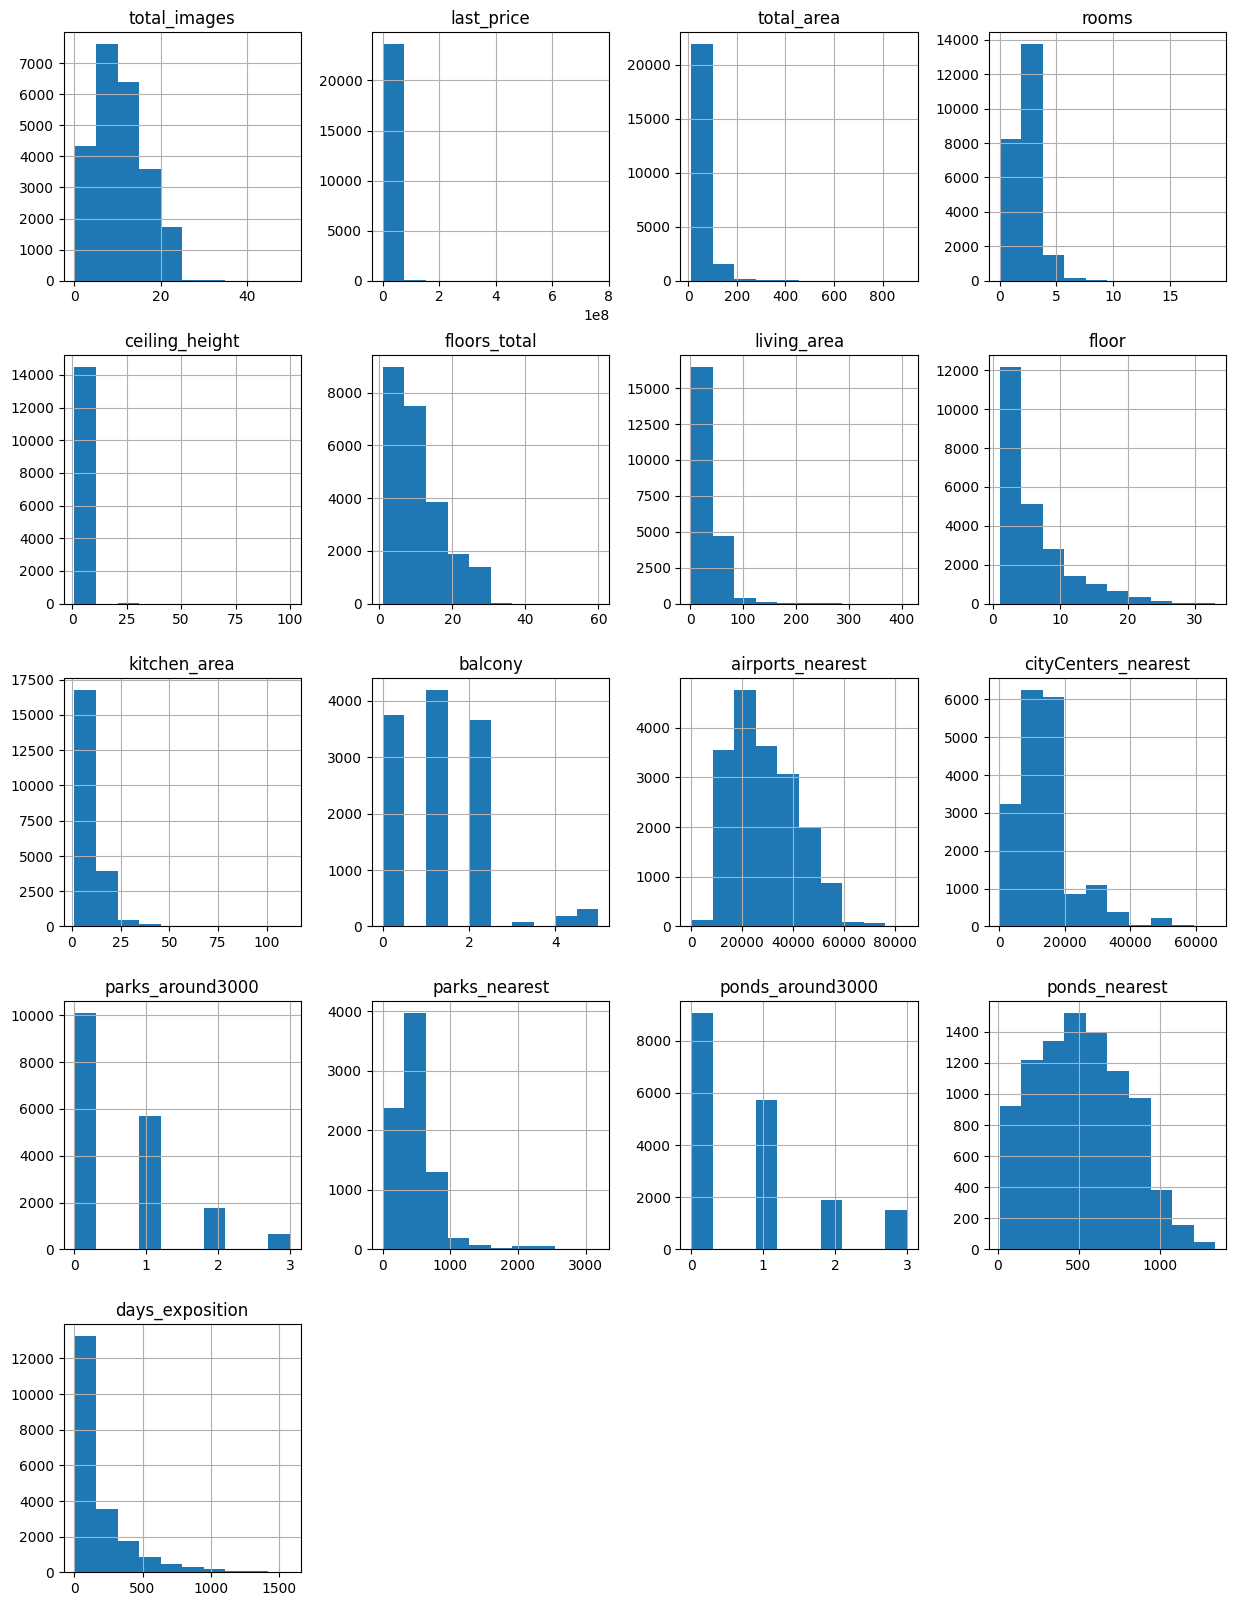

In [4]:
#строим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))
plt.show()

**Вывод: Исходя из полученных гистограмм и информации о датасете видно что перед нахождением особенностей и зависимостей на рынке недвижимости необходимо предобработать данные. Данные в столбцах ceiling_height, last_price, total_area, living_area, kitchen_area, явно содержарт содержат выбросы, которые необходимо убрать.**

### Предобработка данных

#### Обработка пропущенных значений

In [5]:
#выводим количество пропущенных значений для каждого столбца и процент пропуска
#data_na = data.isna().sum()
pd.DataFrame({'na_count': data.isna().sum(), 'na_percent': 100 * round(data.isna().sum() / len(data.index), 2)})

,na_count,na_percent
total_images,0,0.0
last_price,0,0.0
total_area,0,0.0
first_day_exposition,0,0.0
rooms,0,0.0
ceiling_height,9195,39.0
floors_total,86,0.0
living_area,1903,8.0
floor,0,0.0
is_apartment,20924,88.0


Во многих столбцах датасета есть пропущенные значения.

Заполняем пропущенные значения в столбце с числом балконов. Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Поэтому заменяем значение на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

Заполняем пропущенные значения в столбце с числом парков в радиусе 3 км. Если продавец не указал число парков, то, скорее всего рядом их нет. Поэтому заменяем значение на 0.

In [7]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Заполняем пропущенные значения в столбце с числом водоёмов в радиусе 3 км. Если продавец не указал число водоёмов, то, скорее всего рядом их нет. Поэтому заменяем значение на 0.

In [8]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Заполняем пропущенные значения в столбце является ли квартира апартаментами. Если в графе апартаменты пропущено значение, то скорее всего это квартира. Поэтому заменяем значение на False.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски в столбцах parks_nearest и ponds_nearest скорее всего ознаючает что парков и водоёмомов поблизости с квартирой нету.
Проверяем, что в в столбцах parks_nearest и ponds_nearest не осталось пропущенных значений.

In [10]:
print(data['parks_around3000'].loc[data['parks_nearest'].isna()].sum())
print(data['ponds_around3000'].loc[data['ponds_nearest'].isna()].sum())

0.0
0.0


Число строк с незаполненным столбцом floors_total составляет 86, а число строк с незаполненным столбцом locality_name составляет 49. Так как по сравнению с размером датасета (23699 строк) это малочисленные данные, этими данными можно пренебречь.

In [11]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Выводим количество пропущенных значений для каждого столбца после обработки пропущенных значений.

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски в картографических данных (столбцы airports_nearest и airports_nearest) скорее всего появились из-за ошибок а автоматическом заполнении данных. Пропуски в данных столбцах представляют собой довольно большу группу (5524 и 5501) поэтому исключать эти данные не будем. Для небольших населенных пунктов можно было бы заменить эти данные на среднее значение по населенному пункту.

Для заполенения данных в столбцах ceiling_height, living_area, kitchen_area нужно проводить замеры.
Скорее всего эти данные не были заполнены пользователем из-за отсутствия замеров.

Пропуски данных в столбце days_exposition говорят о том что объявление еще не было снято.

#### Изменение типов данных

In [13]:
#выводим информацию о типах данных по каждому столбцу датафрейма
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

In [14]:
#Переводим строки столбца floors_total в целочисленный тип
data['floors_total'] = data['floors_total'].astype('Int64')
#Переводим строки столбца balcony в целочисленный тип
data['balcony'] = data['balcony'].astype('Int64')
#Переводим строки столбца parks_around3000 в целочисленный тип
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
#Переводим строки столбца ponds_around3000 в целочисленный тип
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
#Переводим строки столбца first_day_exposition в дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Выводим информацию о типах данных по каждому столбцу датафрейма после изменения типов данных.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony              

В ходе предобработки данных были преобразован тип данных столбцов с информацией о этаже, количестве балконов, количестве парков в радиусе 3 км, количестве водоемов в радиусе 3 км так, как эти данные - целочисленные.

Данные в столбце first_day_exposition тип данных был изменен со строкового типа на дату.

Также целочисленными данными является колличество дней со дня публикации объявления (столбец days_exposition). В этом столбце содержится много пропущенных данных. Эти данные означают то, что объявление еще не закрыто. Так как пропущенное значение (N/A) является вещественным значение, переводить его в целочисленный тип не будем.

#### Проверка данных на дубликаты

Проверяем есть ли в датасете явные строки-дубликаты

In [16]:
data.duplicated().sum()

0

В датесете нету явных строк-дубликатов.

Выводим на экран число и список уникальных названий.

In [17]:
unique_names = sorted(data['locality_name'].unique())
print(len(unique_names))
unique_names

364


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

В датасете содержится 364 уникальных названия местности. Сократим число названий удалив неявные дубликаты.
Сформируем обновленный датасет без дубликатов в названиях местности.

In [18]:
#список названий-дубликатов которые нужно заменить
name_to_change = [
    'поселок станции',
    'посёлок станции',
    'посёлок при железнодорожной станции',
    'поселок при железнодорожной станции',
    'поселок городского типа',
    'посёлок городского типа',
    'коттеджный поселок',
    'коттеджный посёлок',
    'городской посёлок',
    'городской поселок',
    'посёлок',
    'садоводческое некоммерческое товарищество'
]

#функция заменяющая названия-дубликаты
def rename_locality_name (row):
    try:
        if row.startswith(name_to_change[0]):
            return 'поселок' + row[len(name_to_change[0]):]
        if row.startswith(name_to_change[1]):
            return 'поселок' + row[len(name_to_change[1]):]
        if row.startswith(name_to_change[2]):
            return 'поселок' + row[len(name_to_change[2]):]
        if row.startswith(name_to_change[3]):
            return 'поселок' + row[len(name_to_change[3]):]        
        if row.startswith(name_to_change[4]):
            return 'поселок' + row[len(name_to_change[4]):]
        if row.startswith(name_to_change[5]):
            return 'поселок' + row[len(name_to_change[5]):]
        if row.startswith(name_to_change[6]):
            return 'поселок' + row[len(name_to_change[6]):]
        if row.startswith(name_to_change[7]):
            return 'поселок' + row[len(name_to_change[7]):]
        if row.startswith(name_to_change[8]):
            return 'поселок' + row[len(name_to_change[8]):]
        if row.startswith(name_to_change[9]):
            return 'поселок' + row[len(name_to_change[9]):]        
        if row.startswith(name_to_change[10]):
            return 'поселок' + row[len(name_to_change[10]):]             
        if row.startswith(name_to_change[11]):
            return 'садовое товарищество' + row[len(name_to_change[11]):]
        else:
            return row
    except:
        pass

In [19]:
#применяем функцию rename_locality_name к столбцу locality_name датасета
data['locality_name'] = data['locality_name'].apply(rename_locality_name)

In [20]:
#проверяем датасет
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Выводим на экран число и список уникальных названий после удаления неявных дубликатов.

In [21]:
unique_names_new = sorted(data['locality_name'].unique())
print(len(unique_names_new))
unique_names_new

318


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

Удалив названия-дубликаты местности, число уникальных названий сократилось с 364 до 318 наименований.

#### Устранение редких и выбивающихся значений

In [22]:
#Проверим для каждого из столбцов список уникальных значений
for column in data.columns:
    print('Уникальные значения в столбце', column)
    text = sorted(data[column].unique())
    print(text)
    print()

Уникальные значения в столбце total_images
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 37, 39, 42, 50]

Уникальные значения в столбце last_price
[12190.0, 430000.0, 440000.0, 450000.0, 470000.0, 480000.0, 490000.0, 500000.0, 520000.0, 530000.0, 550000.0, 560000.0, 565000.0, 580000.0, 585000.0, 590000.0, 600000.0, 620000.0, 630000.0, 650000.0, 660000.0, 680000.0, 690000.0, 700000.0, 710000.0, 720000.0, 730000.0, 740000.0, 750000.0, 760000.0, 770000.0, 777000.0, 780000.0, 790000.0, 799000.0, 800000.0, 820000.0, 850000.0, 860000.0, 869000.0, 870000.0, 880000.0, 890000.0, 900000.0, 910000.0, 920000.0, 945750.0, 950000.0, 965780.0, 970000.0, 980000.0, 990000.0, 995000.0, 999000.0, 999999.0, 1000000.0, 1010000.0, 1020000.0, 1030000.0, 1050000.0, 1060000.0, 1070000.0, 1080000.0, 1090000.0, 1099000.0, 1100000.0, 1110000.0, 1130000.0, 1150000.0, 1170000.0, 1180000.0, 1190000.0, 1199000.0, 1200000.0, 1220000.0, 12

In [23]:
#Выведем информацию о значениях столбца датасета
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,14481.000000,23565.0,21700.000000,23565.000000,21343.000000,23565.0,18041.000000,18064.000000,23565.0,8030.000000,23565.0,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.5899,518.289509,180.741395
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.0,2.000000,1.000000,1.300000,0.0,0.000000,181.000000,0.0,1.000000,0.0,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.510000,5.0,18.600000,2.000000,7.000000,0.0,18565.000000,9238.000000,0.0,288.000000,0.0,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.0,30.000000,4.000000,9.100000,0.0,26757.000000,13096.500000,0.0,455.000000,0.0,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.800000,16.0,42.300000,8.000000,12.000000,1.0,37273.000000,16285.000000,1.0,612.000000,1.0,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.0,409.700000,33.000000,112.000000,5.0,84869.000000,65968.000000,3.0,3190.000000,3.0,1344.000000,1580.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.96066,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782


Проверяя все уникальные значения столбцов и максимальные/минимальные значения видим:
1. в столбце rooms есть позиции с 0 комнат и при этом не являющиеся студиями, что явно является ошибкой;
2. есть небольшая выборка квартир, где число комнат равно 1, которые являются студиями;
3. в столбцах living_area, days_exposition есть значения с большим числом нулей после запятой, которые можно отбросить.
4. в данных есть строки с ошибкой в площадях;
5. в столбце ceiling_height есть явно неправильные значения;
6. в столбцах last_price, total_area, living_area kitchen_area есть выбивающиеся значения;

In [24]:
#проверяем строки датасета с квартирами, где указано 0 комнат и не являющиеся студиями
#print(len(data.query('rooms == 0 and studio == False')))
#data.query('rooms == 0 and studio == False')

print(len(data.loc[(data['rooms'] == 0) & (data['studio'] == False)]))
data.loc[(data['rooms'] == 0) & (data['studio'] == False)]

59


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.0,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.3,19,False,...,NaN,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18,NaN,8,False,...,NaN,1,поселок Мурино,NaN,NaN,0,NaN,0,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.0,3,False,...,NaN,1,поселок Новый Свет,NaN,NaN,0,NaN,0,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27,18.0,7,False,...,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03,0,NaN,18,15.0,16,False,...,NaN,1,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4,10.5,3,False,...,NaN,1,поселок Корнево,NaN,NaN,0,NaN,0,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01,0,NaN,18,18.7,9,False,...,NaN,2,Санкт-Петербург,32036.0,8175.0,0,NaN,1,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10,0,NaN,10,18.0,6,False,...,NaN,2,Сертолово,NaN,NaN,0,NaN,0,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01,0,NaN,25,18.0,4,False,...,NaN,2,Санкт-Петербург,10031.0,13330.0,1,915.0,0,NaN,42.0


Так как таких строк всего лишь 59, то исправим эти строчки, поставив в столбец studio значение True.

In [25]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False), 'studio'] = True
#выводим колчество строк с 0 комнат и не являющихся студиями для проверки того, что данные исправлены
len(data.loc[(data['rooms'] == 0) & (data['studio'] == False)]['studio'])

0

In [26]:
#проверяем строки датасета с квартирами, где указана 1 комната, которые являются студиями
print(len(data.query('rooms == 1 and studio == True')))
data.query('rooms == 1 and studio == True')

11


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2389,5,2250000.0,25.41,2016-06-07,1,NaN,12,17.08,8,False,...,NaN,2,Санкт-Петербург,14125.0,12921.0,2,328.0,2,485.0,26.0
3187,13,3800000.0,27.00,2016-05-17,1,NaN,14,18.00,8,False,...,NaN,2,Санкт-Петербург,50348.0,16053.0,0,NaN,0,NaN,45.0
4180,4,4500000.0,34.00,2016-04-25,1,2.8,10,21.00,10,False,...,NaN,2,Санкт-Петербург,23609.0,5299.0,0,NaN,1,433.0,62.0
8683,10,3500000.0,32.50,2016-05-05,1,3.0,23,29.90,11,False,...,NaN,2,Санкт-Петербург,34967.0,14640.0,0,NaN,1,564.0,45.0
11026,1,2800000.0,28.00,2016-05-04,1,NaN,26,19.00,6,False,...,NaN,2,поселок Парголово,53511.0,19687.0,0,NaN,0,NaN,45.0
12935,10,2200000.0,31.00,2016-05-15,1,2.5,8,22.30,5,False,...,NaN,1,Никольское,NaN,NaN,0,NaN,0,NaN,44.0
15142,2,2700000.0,30.00,2016-05-10,1,NaN,21,26.00,6,False,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,55.0
18732,4,2400000.0,22.00,2016-05-06,1,NaN,10,15.00,6,False,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
20086,0,1550000.0,22.00,2016-05-11,1,2.7,15,10.94,14,False,...,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,45.0
21702,9,2349000.0,23.40,2016-05-19,1,2.7,20,16.00,8,False,...,NaN,1,деревня Новое Девяткино,NaN,NaN,0,NaN,0,NaN,34.0


Так как таких строк всего лишь 11, то исправим эти строчки, поставив в столбец room значение 0.

In [27]:
data.loc[(data['rooms'] == 1) & (data['studio'] == True), 'rooms'] = 0
#выводим колчество строк с 1 комнатой и являющихся студиями для проверки того, что данные исправлены
len(data.loc[(data['rooms'] == 1) & (data['studio'] == True)]['rooms'])

0

In [28]:
#проверяем есть ли в датасете какие-то аномалии со студиями и количеством комнат, отличающихся от 0
print(data.loc[data['studio'] == True]['rooms'].unique())

[0]


В результате замены значений в датасете данные со значением True в столбце studio теперь соответсвуют значению 0 в столбце rooms.

In [29]:
#округляем значение с большим числом нулей после запятой в столбцах living_area и days_exposition
data['living_area'] = data['living_area'].apply(lambda x: round(x, 2))
data['days_exposition'] = data['days_exposition'].apply(lambda x: round(x, 0))

In [30]:
#проверяем нету ли ошибок, когда этаж квартиры больше последнего этажа здания
len(data.query('floor > floors_total'))

C:\Users\sovie\AppData\Local\Temp\ipykernel_19144\1201651507.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  len(data.query('floor > floors_total'))


0

In [31]:
#проверяем нету ли ошибок в значениях, когда сумма жилой и кухонной площадей больше суммарной площади помещения
len(data.query('total_area < living_area + kitchen_area'))
#выводим строки с ошибкой на экран
data.query('total_area < living_area + kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14,1,2.65,9,26.10,5,False,...,6.20,0,Санкт-Петербург,13952.0,15031.0,0,NaN,1,824.0,12.0
545,9,4700000.0,23.80,2018-12-28,1,NaN,18,20.00,9,False,...,5.00,0,Санкт-Петербург,9731.0,11849.0,0,NaN,0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08,1,2.70,19,30.55,2,False,...,9.28,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,70.0
601,12,5600000.0,53.70,2017-04-18,2,2.50,12,48.30,5,False,...,7.00,2,Санкт-Петербург,50477.0,13252.0,2,220.0,1,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27,1,2.64,25,23.43,25,False,...,23.43,2,Санкт-Петербург,43396.0,12153.0,0,NaN,0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12,2,27.00,2,38.00,2,False,...,8.60,2,поселок Большая Ижора,NaN,NaN,0,NaN,0,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26,1,2.50,9,30.60,6,False,...,8.00,2,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16,2,NaN,16,62.00,12,False,...,32.40,0,Санкт-Петербург,10934.0,12551.0,0,NaN,0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20,2,NaN,5,44.00,5,False,...,8.00,1,Санкт-Петербург,14103.0,15182.0,1,488.0,0,NaN,7.0


Так как таких строк всего лишь 64, что не велико по сравнению с размером датасета (23565 строк). Удаляем эти строки из нашей выборки.

In [32]:
#проверяем размер датасета до удаления строк с ошибкой
len(data)

23565

In [33]:
data = data.loc[~((data['total_area'] < data['living_area'] + data['kitchen_area']) 
         & (data['total_area'] != 'NaN')
         & (data['living_area'] != 'NaN')
         & (data['kitchen_area'] != 'NaN'))
]

In [34]:
#проверяем размер датасета после удаления строк с ошибкой
len(data)

23501

Как видим, 23564-23501=64. Из датасета были удалены именно строки с ошибкой в площадях квартиры.

In [35]:
#Выведем еще раз спискок уникальных значений высот полотков
ceiling_height_unique = sorted(data['ceiling_height'].unique())
print(ceiling_height_unique)

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Как видно из списка высот потолков в датасете присутсвуют квартиры с аномально высокими потолками. Скоррее всего в данных ошибка и некоторые значения в 10 раз больше реальных. Чтобы устранить эти ошибки, поделим высоты потолков больше 10 м на 10. 

In [36]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] /= 10

In [37]:
ceiling_height_unique = sorted(data['ceiling_height'].unique())
print(ceiling_height_unique)

[1.0, 1.03, 1.2, 1.4, 1.75, 2.0, 2.2, 2.25, 2.2600000000000002, 2.7, nan, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 

Некоторые значение после деления получились с большим числом нулей после запятой, поэтому округлим их.

In [38]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: round(x, 2))

В значениях высоты потолков по прежнему есть выбивающиеся значения. Как и слишком низкие потолки, например 1 м, так и слишком высокие потолки, 10 м. Определим какая может быть минимальная и максимальная высота потолка. Для этого построим гистограмму и диаграмму ящик с усами.

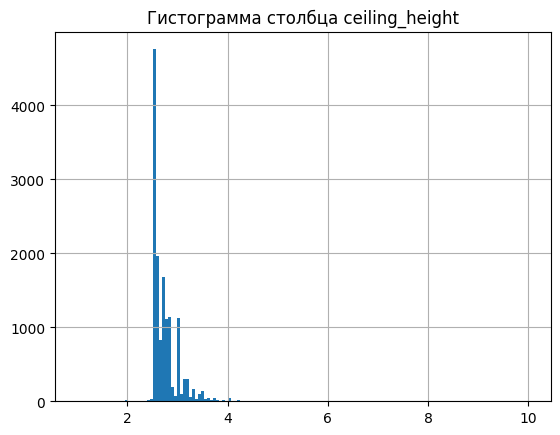

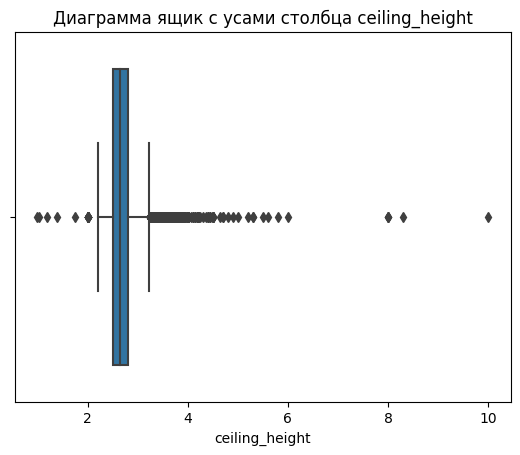

count    14439.000000
mean         2.727741
std          0.299669
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [39]:
#строим гистограмму для столбца ceiling_height
data['ceiling_height'].hist(bins=150)
plt.title('Гистограмма столбца ceiling_height')
plt.show()
#строим диаграмму ящик с усами для столбца ceiling_height
sns.boxplot(x='ceiling_height', data=data)
plt.title('Диаграмма ящик с усами столбца ceiling_height')
plt.show()

data['ceiling_height'].describe()

In [40]:
print('Число квартир с потолками ниже 2.5 м:', len(data.query('ceiling_height < 2.5')))
print('Число квартир с потолками выше 4 м:', len(data.query('ceiling_height > 4')))

Число квартир с потолками ниже 2.5 м: 78
Число квартир с потолками выше 4 м: 50


Как видно из графиков, в датасете есть выбросы, медианное значение равно 2.65.
В выборке практически не встречается квартир с высотой потолков меньше 2.5 (всего 78 таких квартир). Также практически не встречается квартир с высотой потолков выше 4 (всего 50 таких квартир).
Удаляем из датасета выбивающиеся значения. 

In [41]:
data = data.loc[(data['ceiling_height'] <= 4) & (data['ceiling_height'] >= 2.5) | (data['ceiling_height'].isna())]

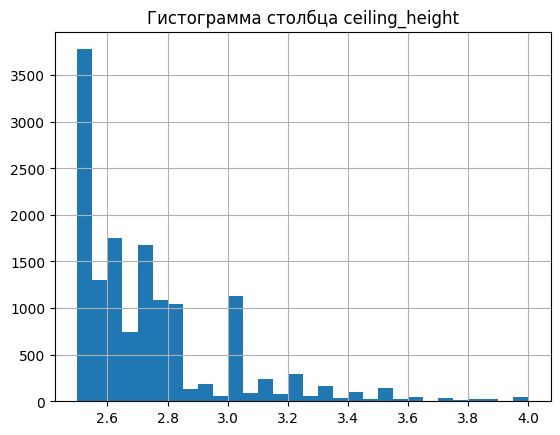

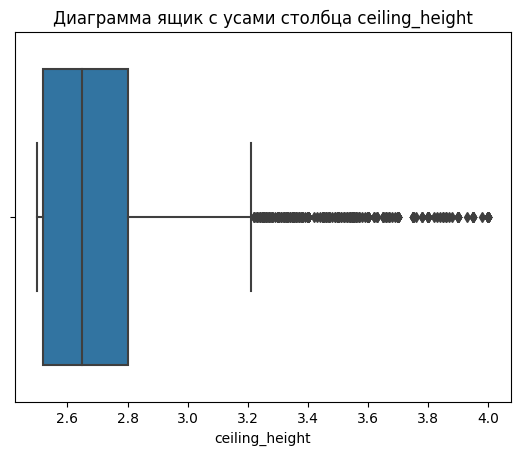

count    14311.000000
mean         2.722480
std          0.257141
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

In [42]:
#строим гистограмму для столбца ceiling_height после удаления выбивающихся значений
data['ceiling_height'].hist(bins=30)
plt.title('Гистограмма столбца ceiling_height')
plt.show()
#строим диаграмму ящик с усами для столбца ceiling_height после удаления выбивающихся значений
sns.boxplot(x='ceiling_height', data=data)
plt.title('Диаграмма ящик с усами столбца ceiling_height')
plt.show()

data['ceiling_height'].describe()

Проверим данные по последней цене квартиры на аномальные и выбивающиеся значения.

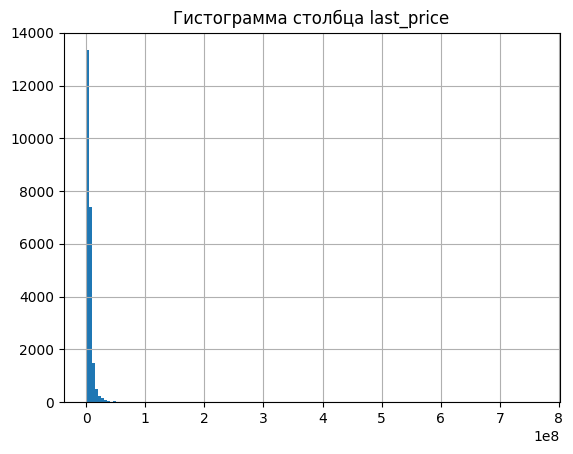

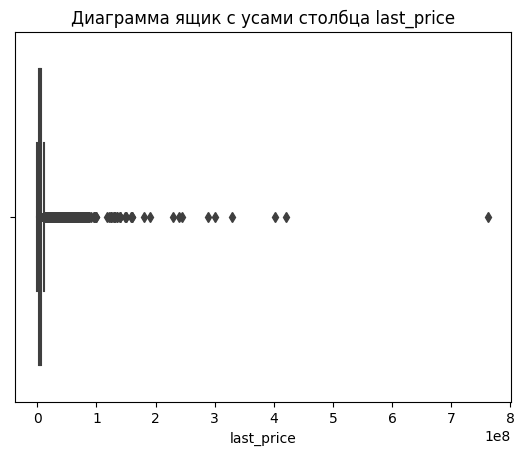

count    2.337300e+04
mean     6.502901e+06
std      1.076417e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.646000e+06
75%      6.772762e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [43]:
#строим гистограмму для столбца last_price
data['last_price'].hist(bins=150)
plt.title('Гистограмма столбца last_price')
plt.show()
#строим диаграмму ящик с усами для столбца last_price
sns.boxplot(x='last_price', data=data)
plt.title('Диаграмма ящик с усами столбца last_price')
plt.show()

data['last_price'].describe()

In [44]:
print('Число квартир дороже 50 000 000:', len(data.query('last_price > 50000000')))
print('Число квартир дешевле 1 000 000:', len(data.query('last_price < 1000000')))

Число квартир дороже 50 000 000: 121
Число квартир дешевле 1 000 000: 224


Как видно из графиков, в датасете есть выбросы, медианное значение равно 4 850 000. В выборке практически не встречается квартир дороже 50 000 000 (всего 78 таких квартир). Также практически не встречается квартир дешевле 1 000 0000 (всего 87 таких квартир). Удаляем из датасета выбивающиеся значения.

In [45]:
data = data.loc[(data['last_price'] <= 50000000) & (data['last_price'] >= 1000000)]

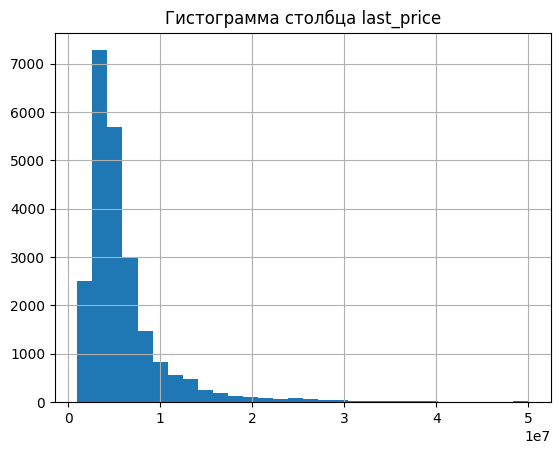

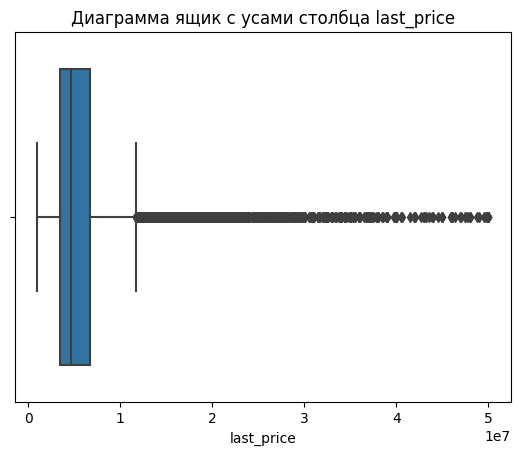

count    2.302800e+04
mean     6.042461e+06
std      4.953433e+06
min      1.000000e+06
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      5.000000e+07
Name: last_price, dtype: float64

In [46]:
#строим гистограмму для столбца last_price после удаления выбивающихся значений
data['last_price'].hist(bins=30)
plt.title('Гистограмма столбца last_price')
plt.show()
#строим диаграмму ящик с усами для столбца last_price после удаления выбивающихся значений
sns.boxplot(x='last_price', data=data)
plt.title('Диаграмма ящик с усами столбца last_price')
plt.show()

data['last_price'].describe()

Проверим данные по общей площади квартиры на аномальные и выбивающиеся значения.

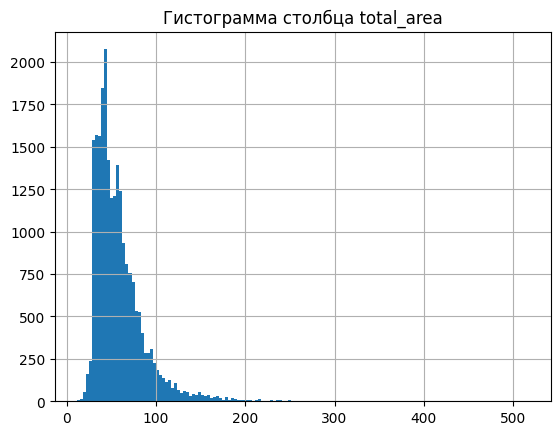

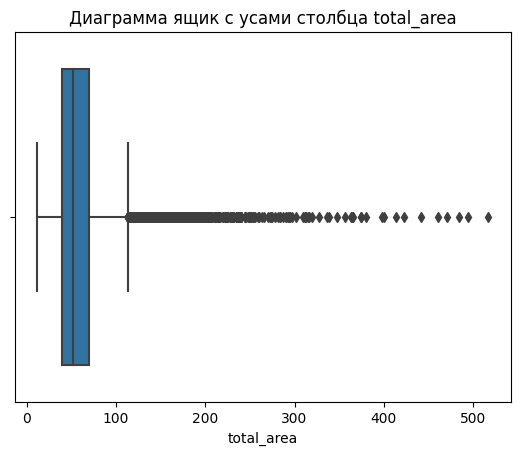

count    23028.000000
mean        59.382389
std         31.101624
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        517.000000
Name: total_area, dtype: float64

In [47]:
#строим гистограмму для столбца total_area
data['total_area'].hist(bins=150)
plt.title('Гистограмма столбца total_area')
plt.show()
#строим диаграмму ящик с усами для столбца total_area
sns.boxplot(x='total_area', data=data)
plt.title('Диаграмма ящик с усами столбца total_area')
plt.show()

data['total_area'].describe()

In [48]:
print('Число квартир c общей площадью больше 200:', len(data.query('total_area > 200')))
print('Число квартир c общей площадью меньше 25:', len(data.query('total_area < 25')))

Число квартир c общей площадью больше 200: 142
Число квартир c общей площадью меньше 25: 178


Как видно из графиков, в датасете есть выбросы, медианное значение равно 53.3. В выборке практически не встречается квартир с общей площадью больше 200 (всего 87 таких квартир). Также практически не встречается квартир с общей площадью меньше 25 (всего 70 таких квартир). Удаляем из датасета выбивающиеся значения.

In [49]:
data = data.loc[(data['total_area'] <= 200) & (data['total_area'] >= 25) | (data['total_area'].isna())]

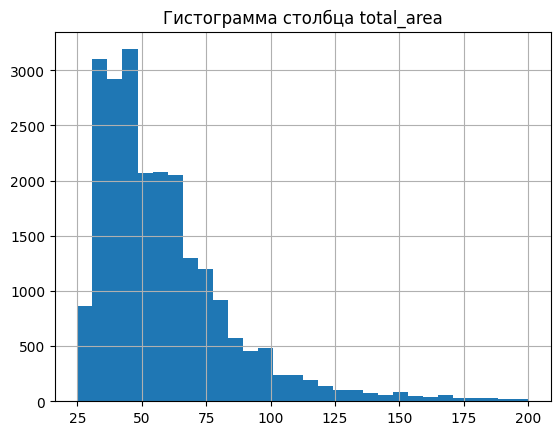

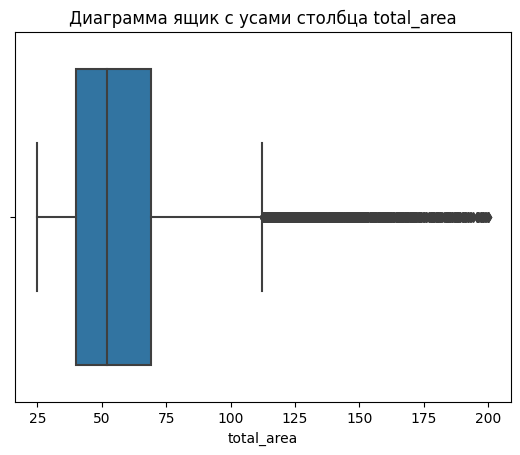

count    22708.000000
mean        58.399453
std         26.075316
min         25.000000
25%         40.100000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

In [50]:
#строим гистограмму для столбца total_area после удаления выбивающихся значений
data['total_area'].hist(bins=30)
plt.title('Гистограмма столбца total_area')
plt.show()
#строим диаграмму ящик с усами для столбца total_area после удаления выбивающихся значений
sns.boxplot(x='total_area', data=data)
plt.title('Диаграмма ящик с усами столбца total_area')
plt.show()

data['total_area'].describe()

Проверим данные по плодащи жилой части на аномальные и выбивающиеся значения.

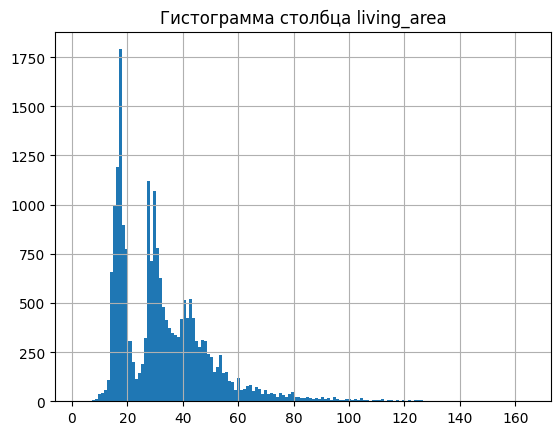

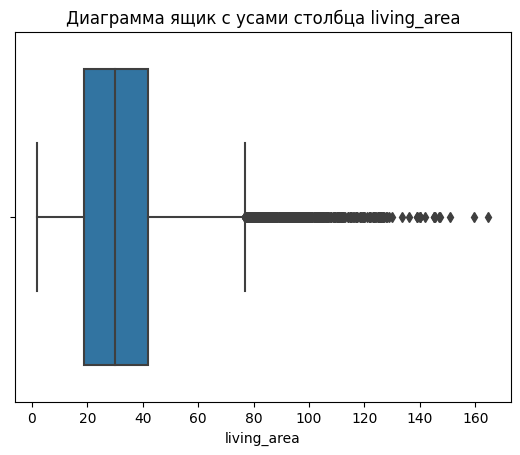

count    20953.000000
mean        33.307925
std         17.229422
min          2.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [51]:
#строим гистограмму для столбца living_area
data['living_area'].hist(bins=150)
plt.title('Гистограмма столбца living_area')
plt.show()
#строим диаграмму ящик с усами для столбца living_area
sns.boxplot(x='living_area', data=data)
plt.title('Диаграмма ящик с усами столбца living_area')
plt.show()

data['living_area'].describe()

In [52]:
print('Число квартир c жилой площадью больше 110:', len(data.query('living_area > 110')))
print('Число квартир c жилой площадью меньше 13:', len(data.query('living_area < 13')))

Число квартир c жилой площадью больше 110: 90
Число квартир c жилой площадью меньше 13: 161


Как видно из графиков, в датасете есть выбросы, медианное значение равно 30.7. В выборке практически не встречается квартир с жилой площадью больше 110 (всего 72 таких квартиры). Также практически не встречается квартир с жилой площадью меньше 13 (всего 81 таких квартира). Удаляем из датасета выбивающиеся значения.

In [53]:
data = data.loc[(data['living_area'] <= 110) & (data['living_area'] >= 13) | (data['living_area'].isna())]

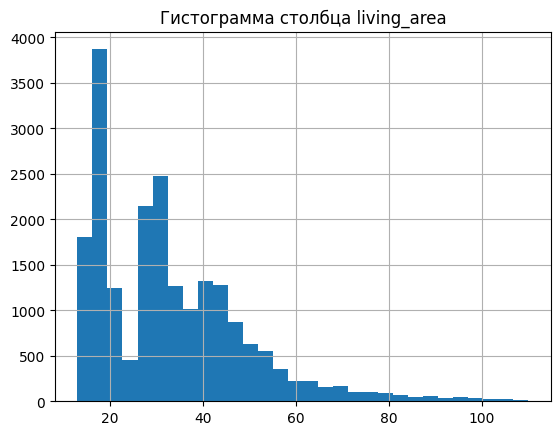

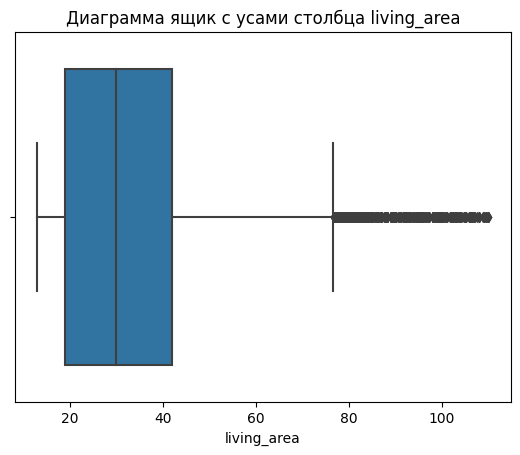

count    20702.000000
mean        33.090638
std         16.142776
min         13.000000
25%         18.900000
50%         30.000000
75%         42.000000
max        110.000000
Name: living_area, dtype: float64

In [54]:
#строим гистограмму для столбца living_area после удаления выбивающихся значений
data['living_area'].hist(bins=30)
plt.title('Гистограмма столбца living_area')
plt.show()
#строим диаграмму ящик с усами для столбца living_area после удаления выбивающихся значений
sns.boxplot(x='living_area', data=data)
plt.title('Диаграмма ящик с усами столбца living_area')
plt.show()

data['living_area'].describe()

Проверим данные по площади кухни на аномальные и выбивающиеся значения.

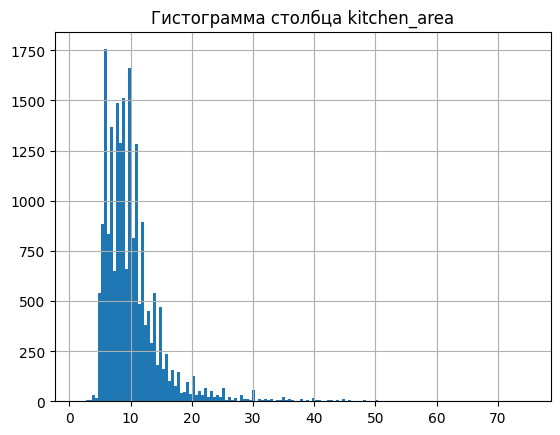

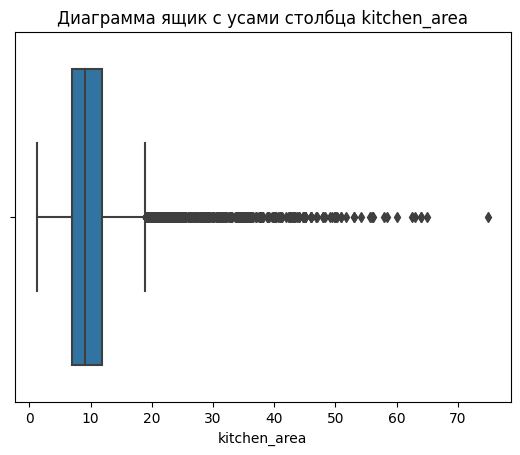

count    20487.000000
mean        10.295261
std          5.120504
min          1.300000
25%          7.000000
50%          9.000000
75%         11.780000
max         75.000000
Name: kitchen_area, dtype: float64

In [55]:
#строим гистограмму для столбца kitchen_area
data['kitchen_area'].hist(bins=150)
plt.title('Гистограмма столбца kitchen_area')
plt.show()
#строим диаграмму ящик с усами для столбца kitchen_area
sns.boxplot(x='kitchen_area', data=data)
plt.title('Диаграмма ящик с усами столбца kitchen_area')
plt.show()

data['kitchen_area'].describe()

In [56]:
print('Число квартир c площадью кухни больше 35:', len(data.query('kitchen_area > 35')))
print('Число квартир c площадью кухни меньше 5:', len(data.query('kitchen_area < 5')))

Число квартир c площадью кухни больше 35: 147
Число квартир c площадью кухни меньше 5: 87


Как видно из графиков, в датасете есть выбросы, медианное значение равно 9. В выборке практически не встречается квартир с площадью кухни больше 35 (всего 101 такая квартира). Также практически не встречается квартир с площадью кухни меньше 5 (всего 56 таких квартир). Удаляем из датасета выбивающиеся значения.

In [57]:
data = data.loc[(data['kitchen_area'] <= 35) & (data['kitchen_area'] >= 5) | (data['kitchen_area'].isna())]

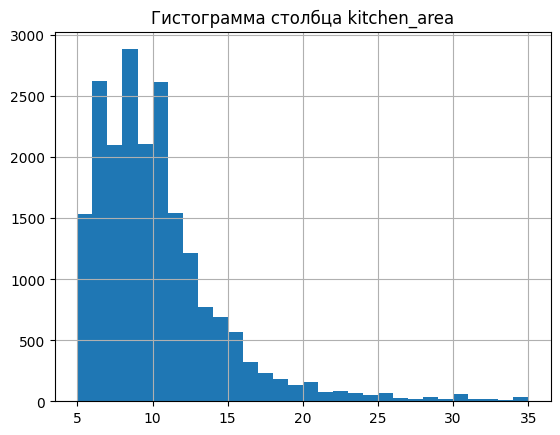

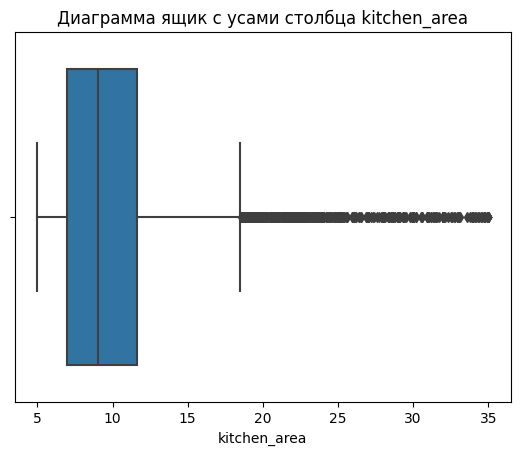

count    20253.000000
mean        10.082394
std          4.245341
min          5.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         35.000000
Name: kitchen_area, dtype: float64

In [58]:
#строим гистограмму для столбца kitchen_area после удаления выбивающихся значений
data['kitchen_area'].hist(bins=30)
plt.title('Гистограмма столбца kitchen_area')
plt.show()
#строим диаграмму ящик с усами для столбца kitchen_area после удаления выбивающихся значений
sns.boxplot(x='kitchen_area', data=data)
plt.title('Диаграмма ящик с усами столбца kitchen_area')
plt.show()

data['kitchen_area'].describe()

В ходе предобработки данных были удалены явно ошибочные значения в столбцах ceiling_height, rooms, studio. Также были устранены редкие и выбивающие значения в столбцах ceiling_height, last_price, total_area, living_area, kitchen_area.

In [59]:
#выводим основную информацию о датафрейме после предобработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22223 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22223 non-null  int64         
 1   last_price            22223 non-null  float64       
 2   total_area            22223 non-null  float64       
 3   first_day_exposition  22223 non-null  datetime64[ns]
 4   rooms                 22223 non-null  int64         
 5   ceiling_height        13673 non-null  float64       
 6   floors_total          22223 non-null  Int64         
 7   living_area           20479 non-null  float64       
 8   floor                 22223 non-null  int64         
 9   is_apartment          22223 non-null  bool          
 10  studio                22223 non-null  bool          
 11  open_plan             22223 non-null  bool          
 12  kitchen_area          20253 non-null  float64       
 13  balcony              

**Вывод: Во время предобработки данных датасета были обработаны пропущенные значения, были изменены некорректные типы данных, датасет был проверен на явные дубликаты, были устранены неявные дубликаты в названиях поселений, были устранены редкие и выбивающие значения. Размер дата сета уменьшился с 23699 строк до 22223 строк. Устанив некорректные значения можно приступать к категоризации данных, добавлению новых столбцов.**

### Добавление новых столбцов в таблицу

In [60]:
#добавим в датасет столбец с ценой одного квардратного метра
data['price_square_m'] = data['last_price'] / data['total_area']
#округлим значения до двух знаков после запятой
data['price_square_m'] = data['price_square_m'].apply(lambda x: round(x, 2))

In [61]:
#добавим в датасет столбцы со днем, месяцем и годом размещениях объявления 
data['day_of_week'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [62]:
#функция categorize_floor для категоризации этажа квартиры
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor != 1 and floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [63]:
#применяем функцию categorize_floor к датасету
data['floor_category'] = data.apply(categorize_floor, axis=1)

In [64]:
#пересчитаем расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)
data['cityCenters_nearest'] /= 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'].apply(lambda x: round(x, 0))

In [65]:
#пересчитаем расстояние до близжайшего аэропорта в километрах (переведем из м в км и округлим до целых значений)
data['airports_nearest'] /= 1000
data['airports_nearest'] = data['airports_nearest'].apply(lambda x: round(x, 0))

In [66]:
#проверим данные
data.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_m,day_of_week,month,year,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0,NaN,0,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,NaN,0,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,1,310.0,2,553.0,137.0,127525.25,3,11,2017,другой
11,9,3300000.0,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0,NaN,0,NaN,7.0,75000.00,0,8,2018,другой
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,False,...,0,NaN,0,NaN,90.0,72037.04,3,6,2016,последний


**Вывод: В таблицу были добавлены новые столбцы, которых не хватало для анализа данных. Были добавлены столбцы облегчающие дальнейшую работу с данными, а именно: день недели, месяц и год публикации объявления о продаже квартиры. Были переведены в более удобный формат столбцы с длинами до центра города и с длинами до близжащего аэропорта, квартиры были категоризированы по этажам. А также добавлен один из самых важных параметров - цена квадратного метра жилья. В следющем шаге можно приступать к анализу данных.**

### Исследовательский анализ данных

#### Изучение параметров объектов

##### Общая площадь

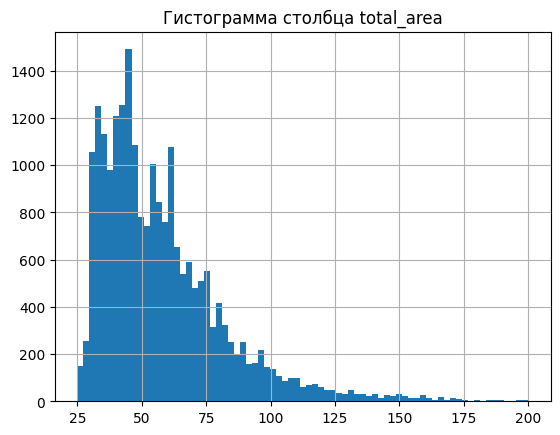

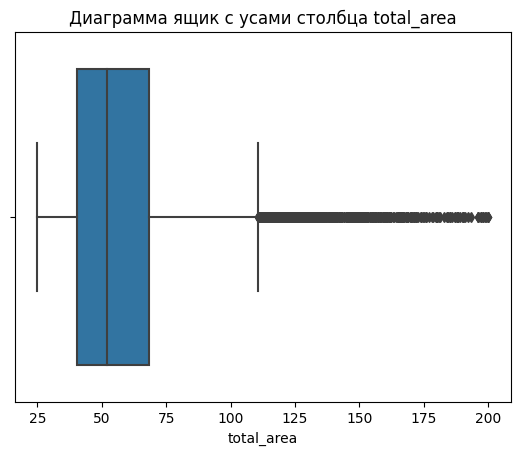

count    22223.000000
mean        57.735450
std         24.546828
min         25.000000
25%         40.300000
50%         52.000000
75%         68.400000
max        200.000000
Name: total_area, dtype: float64

In [67]:
#строим гистограмму для столбца total_area
data.hist('total_area', bins=75)
plt.title('Гистограмма столбца total_area')
plt.show()

#строим диаграмму ящик с усами для столбца total_area
sns.boxplot(x='total_area', data=data)
plt.title('Диаграмма ящик с усами столбца total_area')
plt.show()

data['total_area'].describe()

Среднее значение по выборке: 57.74  
Медианнное значение выборки: 52.00  
Стандартное отклонение: 24.55

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к элитному жилью с большими общими площадями (больше 110). После преобработки, данные довольно однородные, среднее и медиана не сильно отличаются.

##### Жилая площадь

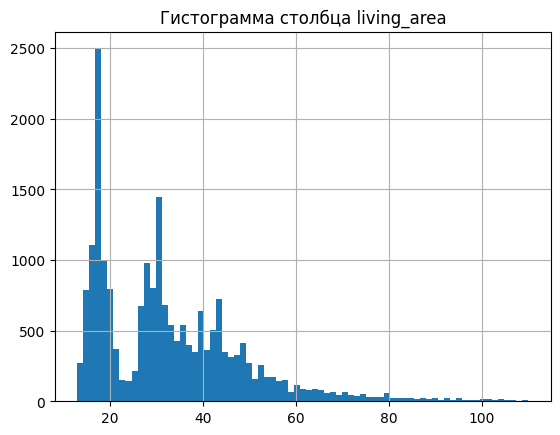

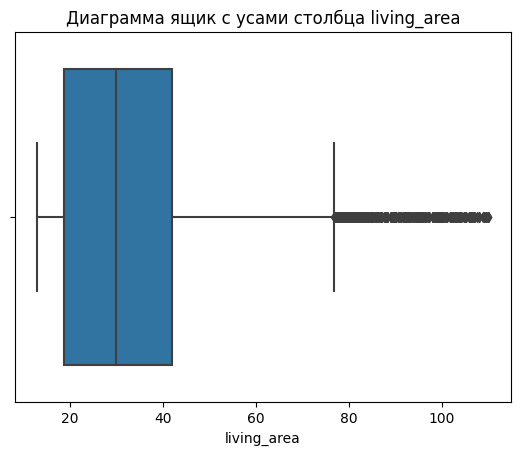

count    20479.000000
mean        33.004410
std         16.071888
min         13.000000
25%         18.800000
50%         30.000000
75%         42.000000
max        110.000000
Name: living_area, dtype: float64

In [68]:
#строим гистограмму для столбца living_area
data.hist('living_area', bins=75)
plt.title('Гистограмма столбца living_area')
plt.show()
#строим диаграмму ящик с усами для столбца living_area
sns.boxplot(x='living_area', data=data)
plt.title('Диаграмма ящик с усами столбца living_area')
plt.show()

data['living_area'].describe()

Среднее значение по выборке: 33.00  
Медианнное значение выборки: 30.00  
Стандартное отклонение: 16.07

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к элитному жилью с большими жилыми площадями (больше 78). После преобработки, в наборе данных, среднее и медиана не сильно отличаются. Но на гистограмме видно что есть два пика с провалом между ними.

##### Площадь кухни

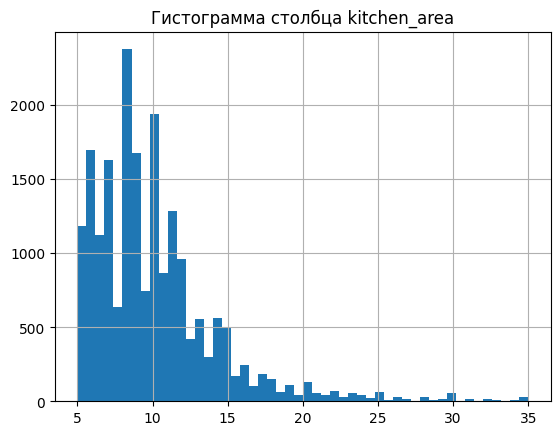

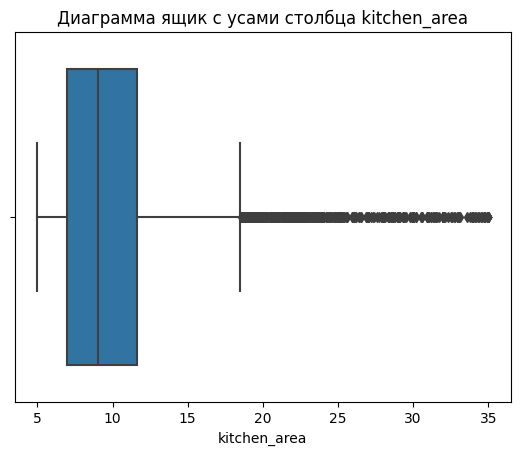

count    20253.000000
mean        10.082394
std          4.245341
min          5.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         35.000000
Name: kitchen_area, dtype: float64

In [69]:
#строим гистограмму для столбца kitchen_area
data.hist('kitchen_area', bins=50)
plt.title('Гистограмма столбца kitchen_area')
plt.show()
#строим диаграмму ящик с усами для столбца kitchen_area
sns.boxplot(x='kitchen_area', data=data)
plt.title('Диаграмма ящик с усами столбца kitchen_area')
plt.show()

data['kitchen_area'].describe()

Среднее значение по выборке: 10.08  
Медианнное значение выборки: 9.00  
Стандартное отклонение: 4.25

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к элитному жилью с большими площадями кухонь (больше 18). После преобработки, данные довольно однородные, среднее и медиана не сильно отличаются.

##### Количество комнат

In [70]:
#функция, считающая процент группы
def percent_share(x): return round(x.count()*100/len(data), 2)

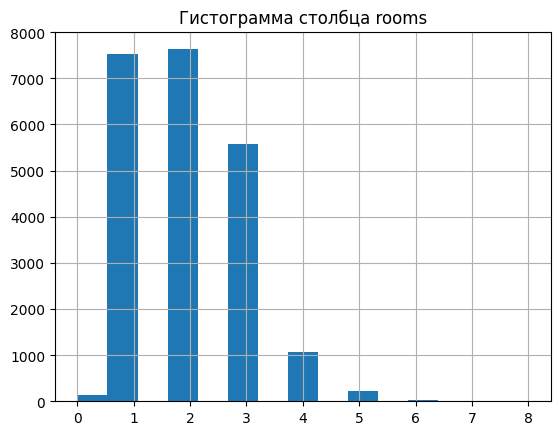

In [71]:
#строим гистограмму для столбца rooms
data.hist('rooms', bins=15)
plt.title('Гистограмма столбца rooms')
plt.show()

In [72]:
#выводим количество публикаций объявления по дням недели в абсолютных и процентных значениях
data_groupby_rooms = data.groupby('rooms')['rooms'].agg(['count', percent_share])
print(data_groupby_rooms)

       count  percent_share
rooms                      
0        140           0.63
1       7532          33.89
2       7628          34.32
3       5583          25.12
4       1071           4.82
5        222           1.00
6         36           0.16
7         10           0.04
8          1           0.00


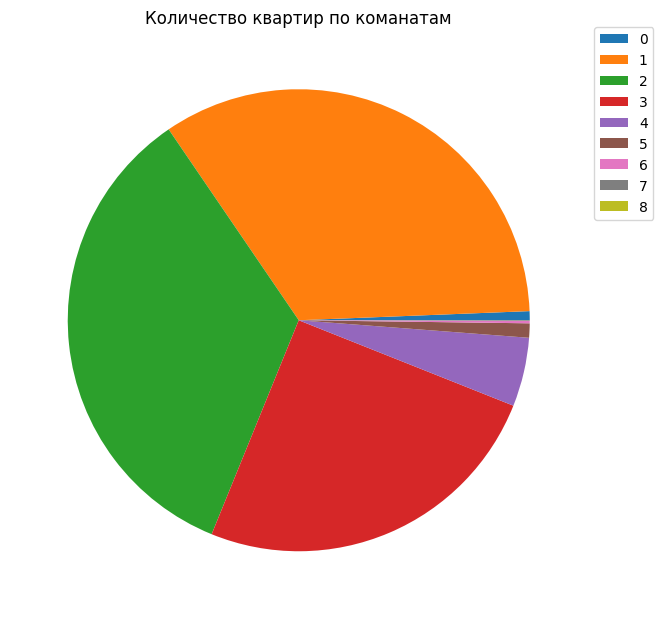

In [73]:
#строим круговую диаграмму количества квартир по количеству комнат
ax = data_groupby_rooms['count'].plot(kind="pie", legend=True, title='Количество квартир по команатам', ylabel='', figsize = (7.5,7.5), labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [74]:
data['rooms'].describe()

count    22223.000000
mean         2.035054
std          0.967283
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Среднее значение по выборке: 2.04  
Медианнное значение выборки: 2.00  
Стандартное отклонение:  0.97

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к элитному жилью с большим числом комнат (5-8). После преобработки, данные довольно однородные, среднее и медиана не сильно отличаются. По диаграмме видно, что в датасете в основном квартиры с 1, 2, 3 комнатами. Вместе эти три группы составляют 93.21%. 

##### Высота потолков

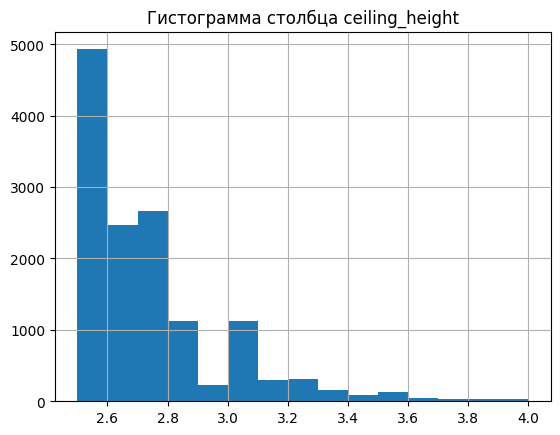

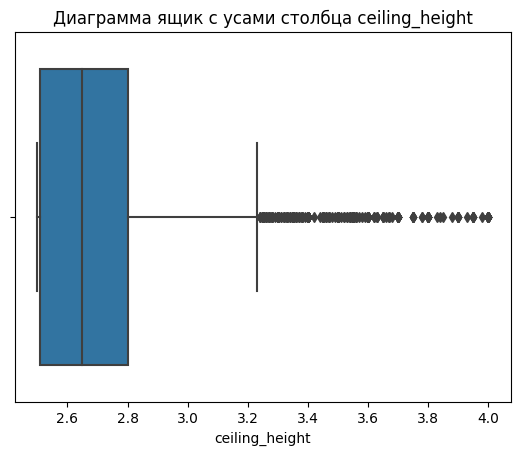

In [75]:
#строим гистограмму для столбца ceiling_height
data.hist('ceiling_height', bins=15)
plt.title('Гистограмма столбца ceiling_height')
plt.show()
#строим диаграмму ящик с усами для столбца ceiling_height
sns.boxplot(x='ceiling_height', data=data)
plt.title('Диаграмма ящик с усами столбца ceiling_height')
plt.show()

In [76]:
data['ceiling_height'].describe()

count    13673.000000
mean         2.711663
std          0.243711
min          2.500000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

Среднее значение по выборке: 2.71  
Медианнное значение выборки: 2.65  
Стандартное отклонение: 0.24

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к элитному жилью с высокими потолками (больше 3.25). После преобработки, данные довольно однородные, среднее и медиана не сильно отличаются.

##### Этаж квартиры

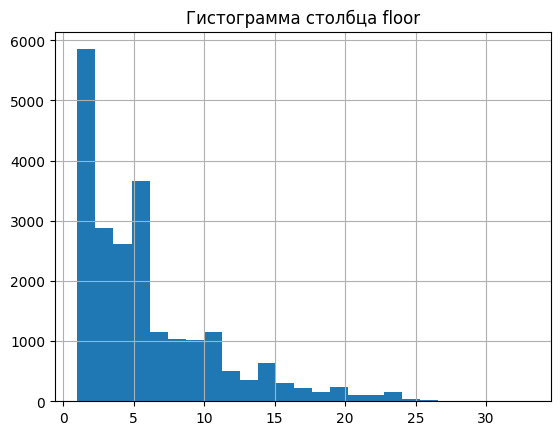

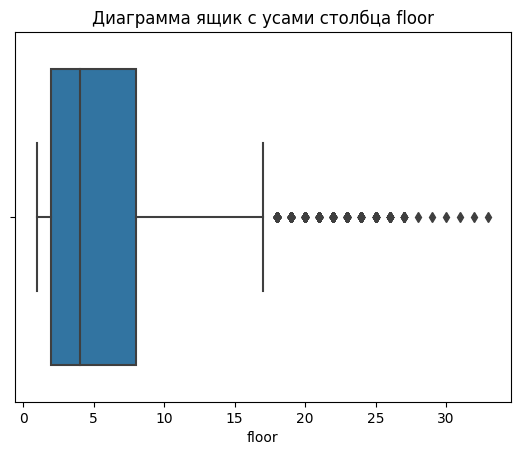

In [77]:
#строим гистограмму для столбца floor
data.hist('floor', bins=25)
plt.title('Гистограмма столбца floor')
plt.show()
#строим диаграмму ящик с усами для столбца floor
sns.boxplot(x='floor', data=data)
plt.title('Диаграмма ящик с усами столбца floor')
plt.show()

In [78]:
data['floor'].describe()

count    22223.000000
mean         5.912208
std          4.882444
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Среднее значение по выборке: 5.91  
Медианнное значение выборки: 4.00  
Стандартное отклонение: 4.88

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к высотному жилью (больше 17 этажей). Большинство квартир раполагаются на 5 этаже и ниже. 

##### Тип этажа квартиры («первый», «последний», «другой»)

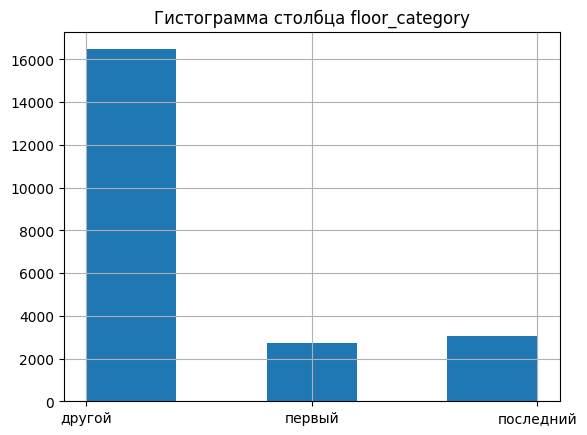

In [79]:
#строим гистограмму для столбца floor_category
data['floor_category'].hist(bins=5)
plt.title('Гистограмма столбца floor_category')
plt.show()

In [80]:
#выводим количество квартир по каждому типу этажа в абсолютных и процентных значениях
data_groupby_floor_category = data.groupby('floor_category')['floor_category'].agg(['count', percent_share])
print(data_groupby_floor_category)

                count  percent_share
floor_category                      
другой          16469          74.11
первый           2715          12.22
последний        3039          13.68


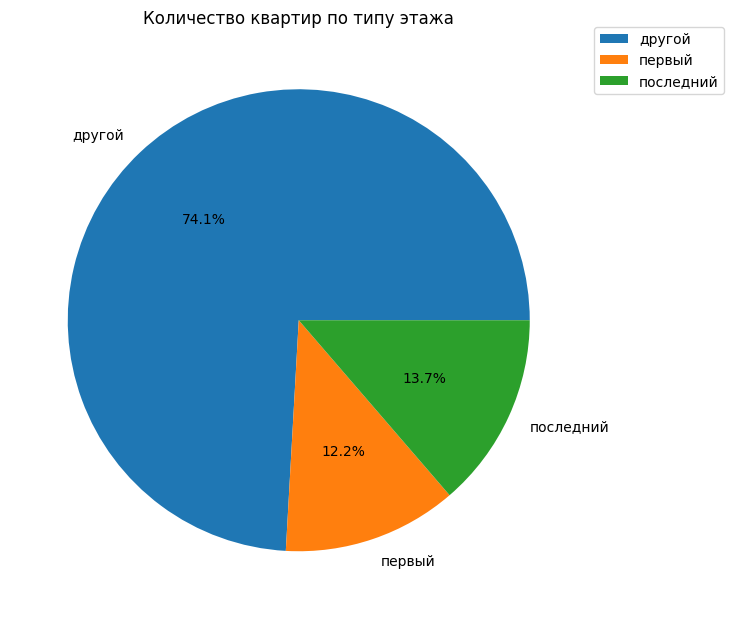

In [81]:
#строим круговую диаграмму, показывающую количетсво квартир, сгруппированных по типу этажа
ax = data_groupby_floor_category['count'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Количество квартир по типу этажа', ylabel='', figsize = (7.5,7.5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

По гистограмме видно, что большинство квартир располагаются на "другом этаже".

##### Общее количество этажей в доме

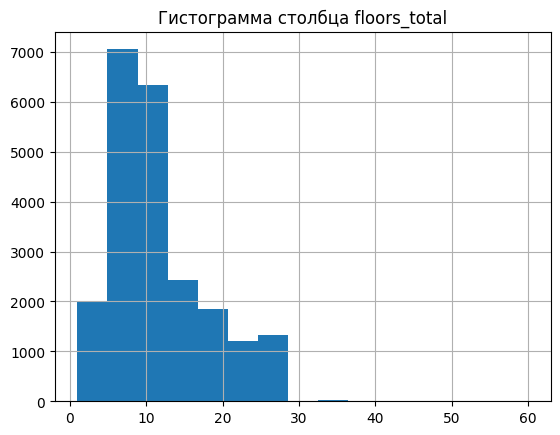

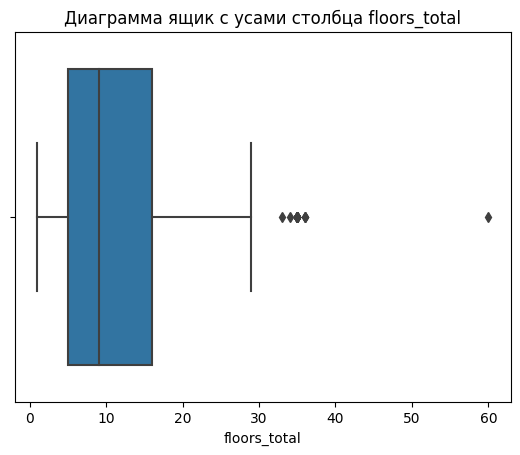

In [82]:
#строим гистограмму для столбца floors_total
data.hist('floors_total', bins=15)
plt.title('Гистограмма столбца floors_total')
plt.show()
#строим диаграмму ящик с усами для столбца floors_total
sns.boxplot(x='floors_total', data=data)
plt.title('Диаграмма ящик с усами столбца floors_total')
plt.show()

In [83]:
data['floors_total'].describe()

count      22223.0
mean     10.788192
std        6.57967
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64

Среднее значение по выборке: 10.79  
Медианнное значение выборки: 9.00  
Стандартное отклонение: 6.58

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к высотному жилью (больше 28 этажей).

##### Расстояние до центра города в метрах

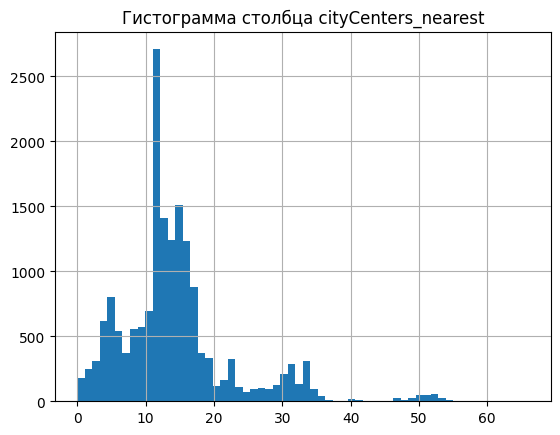

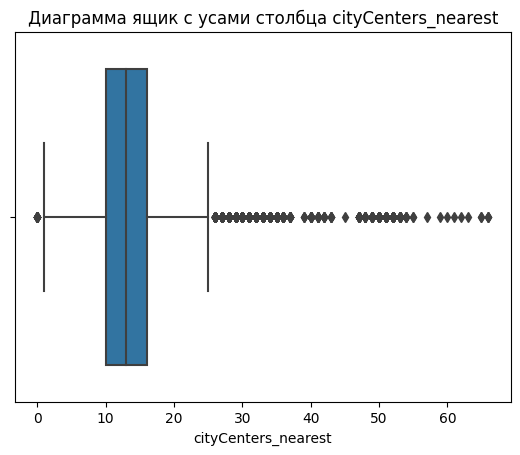

In [84]:
#строим гистограмму для столбца cityCenters_nearest
data.hist('cityCenters_nearest', bins=60)
plt.title('Гистограмма столбца cityCenters_nearest')
plt.show()
#строим диаграмму ящик с усами для столбца cityCenters_nearest
sns.boxplot(x='cityCenters_nearest', data=data)
plt.title('Диаграмма ящик с усами столбца cityCenters_nearest')
plt.show()

In [85]:
data['cityCenters_nearest'].describe()

count    17172.000000
mean        14.377883
std          8.560149
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

Среднее значение по выборке: 14.38  
Медианнное значение выборки: 13.00  
Стандартное отклонение: 8.56

Как видно из графика в данных есть выбросы в правой части графика (эти данные принадлежат к слишком отдаленному от центра жилью (больше 25 киллометров)) и выбросы в левой части графика (эти данные принадлежат к элитному жилью расположенному в центре города (меньше 1 киллометра)). После преобработки, данные довольно однородные, среднее и медиана не сильно отличаются. Визуально распределение похоже колокообразную форму нормального распределения с более длинным правым "хвостом".

##### Расстояние до ближайшего аэропорта

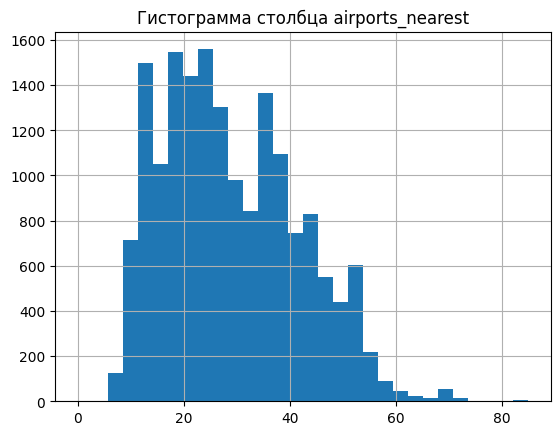

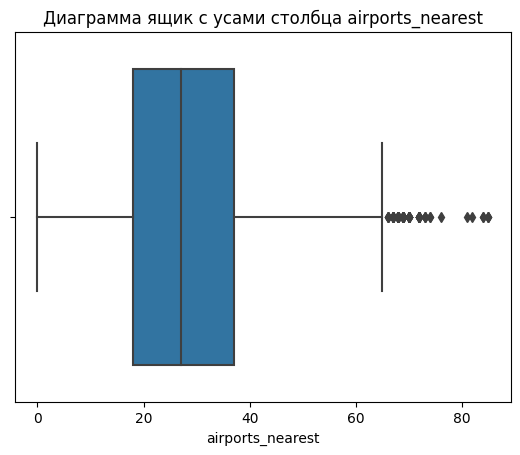

In [86]:
#строим гистограмму для столбца airports_nearest
data.hist('airports_nearest', bins=30)
plt.title('Гистограмма столбца airports_nearest')
plt.show()
#строим диаграмму ящик с усами для столбца airports_nearest
sns.boxplot(x='airports_nearest', data=data)
plt.title('Диаграмма ящик с усами столбца airports_nearest')
plt.show()

In [87]:
data['airports_nearest'].describe()

count    17152.000000
mean        28.861299
std         12.712890
min          0.000000
25%         18.000000
50%         27.000000
75%         37.000000
max         85.000000
Name: airports_nearest, dtype: float64

Среднее значение по выборке: 28.86  
Медианнное значение выборки: 27.00  
Стандартное отклонение: 12.71

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к слишком отдаленному от аэропорта жилью (больше 65 киллометров). После преобработки, данные довольно однородные, среднее и медиана не сильно отличаются. Визуально распределение похоже колокообразную форму нормального распределения с более длинным правым "хвостом" и обрезанным левым "хвостом", что логично так, как совсем близко к аэропортам жилых построек нету.

##### Расстояние до ближайшего парка

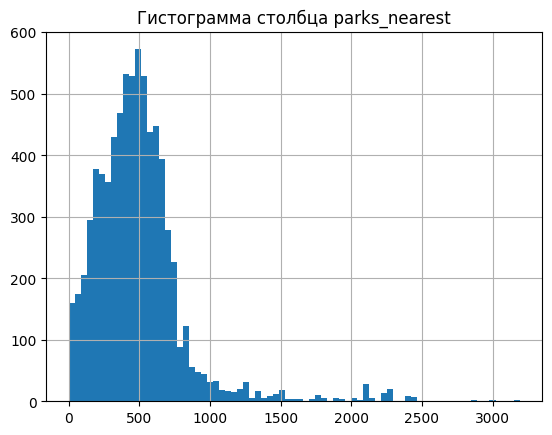

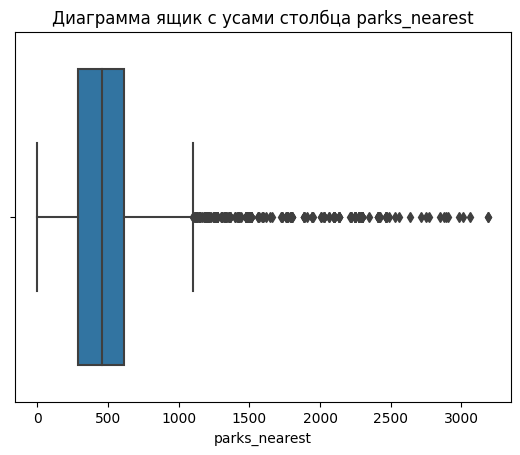

In [88]:
#строим гистограмму для столбца parks_nearest
data.hist('parks_nearest', bins=75)
plt.title('Гистограмма столбца parks_nearest')
plt.show()
#строим диаграмму ящик с усами для столбца parks_nearest
sns.boxplot(x='parks_nearest', data=data)
plt.title('Диаграмма ящик с усами столбца parks_nearest')
plt.show()

In [89]:
data['parks_nearest'].describe()

count    7512.000000
mean      493.690895
std       341.555325
min         1.000000
25%       290.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Среднее значение по выборке: 493.69  
Медианнное значение выборки: 456.00  
Стандартное отклонение: 341.55

Как видно из графика в данных есть выбросы в правой части графика. Эти данные принадлежат к слишком отдаленному от парков жилью (больше 1250 метров). После преобработки среднее и медиана не сильно отличаются. Визуально распределение похоже колокообразную форму нормального распределения с более длинным правым "хвостом" и обрезанным левым "хвостом", что логично так, как непосредственно в парках жилые дома не строят. Также видно большое значение стандартного отклонения, что означает что выборка неоднородная так, как содержится много квартир, расположенных далеко от парков.

##### День и месяц публикации объявления

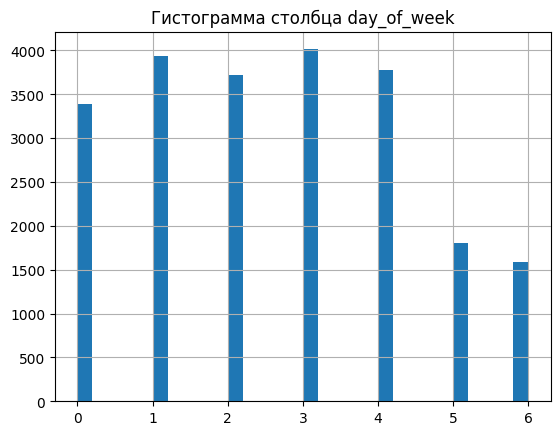

In [90]:
#строим гистограмму для столбца day_of_week
data.hist('day_of_week', bins=30)
plt.title('Гистограмма столбца day_of_week')
plt.show()

In [91]:
#выводим количество публикаций объявления по дням недели в абсолютных и процентных значениях
data_groupby_day_of_week = data.groupby('day_of_week')['day_of_week'].agg(['count', percent_share])
data_groupby_day_of_week['day_of_week_name'] = ['Понедельник',
                                    'Вторник',
                                    'Среда',
                                    'Четверг',
                                    'Пятница',
                                    'Суббота',
                                    'Воскресенье'
                                   ]
print(data_groupby_day_of_week)

             count  percent_share day_of_week_name
day_of_week                                       
0             3388          15.25      Понедельник
1             3936          17.71          Вторник
2             3717          16.73            Среда
3             4012          18.05          Четверг
4             3778          17.00          Пятница
5             1806           8.13          Суббота
6             1586           7.14      Воскресенье


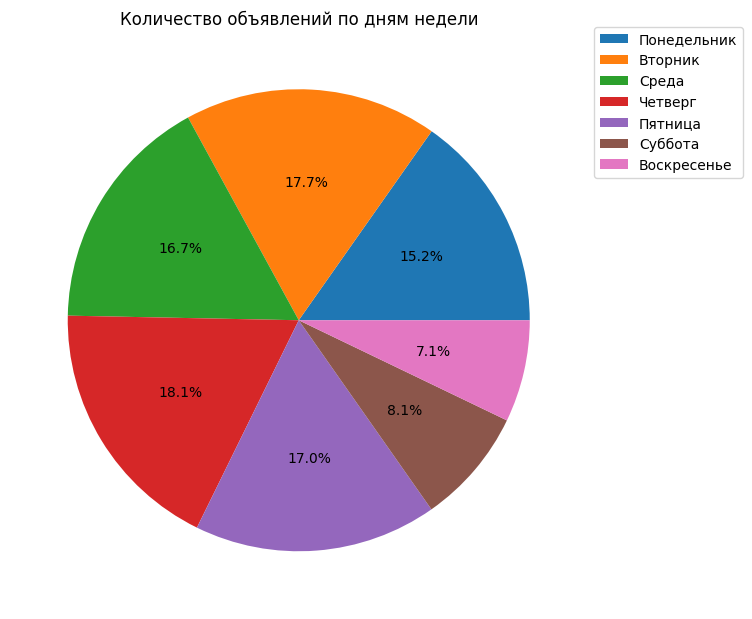

In [92]:
#строим круговую диаграмму количества объявлений по дням недели
labels = data_groupby_day_of_week['day_of_week_name']

ax = data_groupby_day_of_week['count'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Количество объявлений по дням недели', ylabel='', figsize = (7.5,7.5), labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', labels=labels)
plt.show()

По гистограмме видно, что в выходные дни количество публикуемых объявлений резко падает. В течение недели процент публикуемых объявлений о продаже примерно одинаковый.

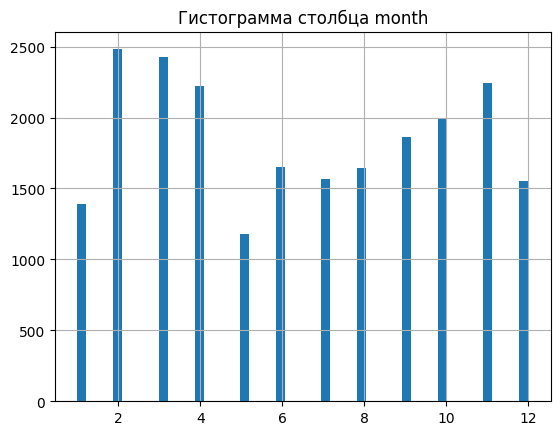

In [93]:
#строим гистограмму для столбца month
data.hist('month', bins=50)
plt.title('Гистограмма столбца month')
plt.show()

In [94]:
#выводим количество публикаций объявления по кажому месяцу в абсолютных и процентных значениях
data_groupby_month = data.groupby('month')['month'].agg(['count', percent_share])
data_groupby_month['month_name'] = ['Январь',
                                    'Февраль',
                                    'Март',
                                    'Апрель',
                                    'Мая',
                                    'Июнь',
                                    'Июль',
                                    'Август',
                                    'Сентябрь',
                                    'Октябрь',
                                    'Ноябрь',
                                    'Декабрь'
                                   ]
print(data_groupby_month)

       count  percent_share month_name
month                                 
1       1389           6.25     Январь
2       2481          11.16    Февраль
3       2428          10.93       Март
4       2221           9.99     Апрель
5       1180           5.31        Мая
6       1654           7.44       Июнь
7       1569           7.06       Июль
8       1642           7.39     Август
9       1863           8.38   Сентябрь
10      1997           8.99    Октябрь
11      2244          10.10     Ноябрь
12      1555           7.00    Декабрь


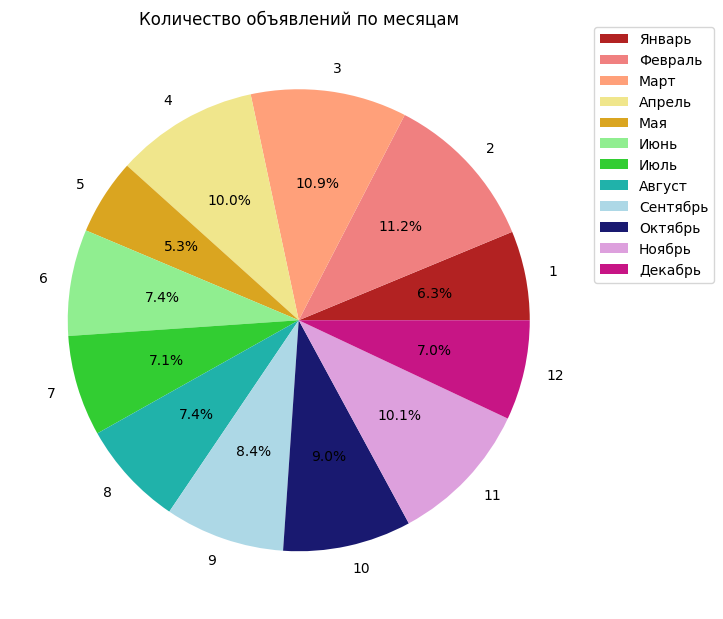

In [95]:
#строим круговую диаграмму количества объявлений по месяцам
colors = ['#B22222', '#F08080', '#FFA07A', '#F0E68C', '#DAA520', '#90EE90', '#32CD32' ,'#20B2AA', '#ADD8E6', '#191970', '#DDA0DD' ,'#C71585']
labels = data_groupby_month['month_name']

ax = data_groupby_month['count'].plot(kind="pie", autopct='%1.1f%%', legend=True, colors = colors, title='Количество объявлений по месяцам', ylabel='', figsize = (7.5,7.5))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', labels=labels)
plt.show()

Месяцы условно можно разделить на три группы: месяцы с активной публикацией объявлений,  месяцы со средней активностью публикации объявлений и месяцы "затишья".  
В первую группу входят: февраль, март, апрель, ноябрь (доля объявлений около 10-11 процентов).  
Во вторую группу входят: январь и май (доля объявлений около 5-6 процентов). Сниженное число публикаций скорее всего объясняется наличием длительных праздников.  
В третью группу входят все остальные месяцы (доля объявлений около 7-8 процентов).

#### Как быстро продавались квартиры?

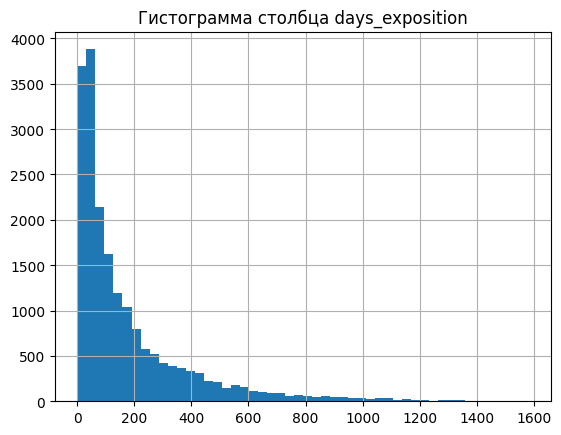

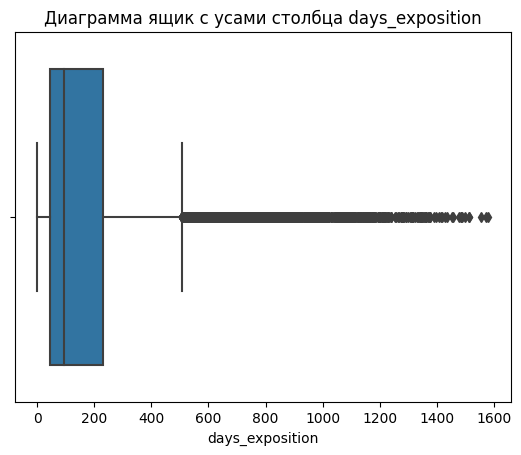

In [96]:
#строим гистограмму для столбца days_exposition
data.hist('days_exposition', bins=50)
plt.title('Гистограмма столбца days_exposition')
plt.show()
#строим диаграмму ящик с усами для столбца days_exposition
sns.boxplot(x='days_exposition', data=data)
plt.title('Диаграмма ящик с усами столбца days_exposition')
plt.show()

In [97]:
def auto_bins(df) -> int:
    df_rows = df.shape[0]
    result = np.ceil((2 * df_rows) ** (1./3))
    return int(result)

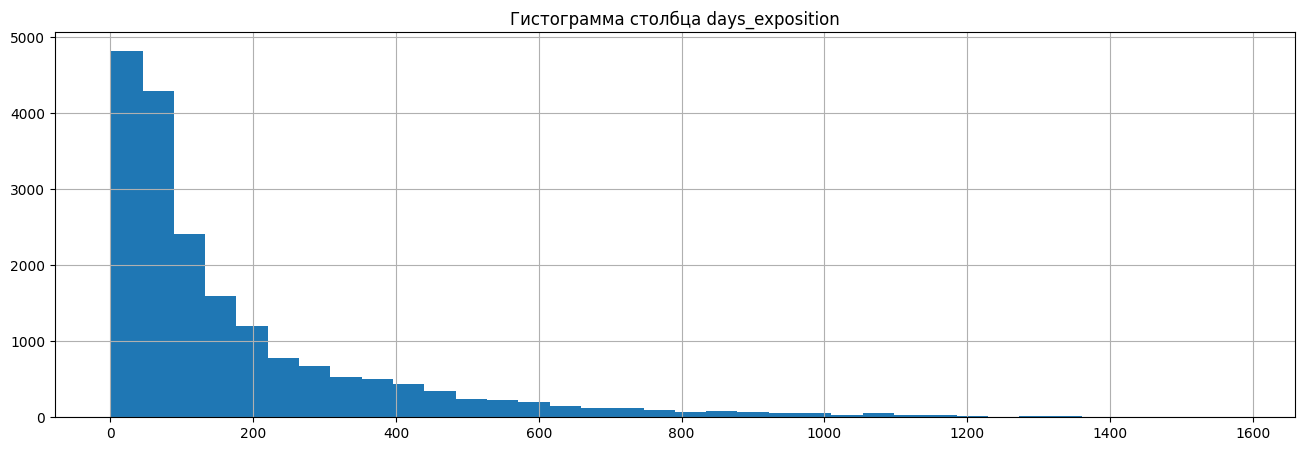

In [98]:
#строим гистограмму для столбца days_exposition
data.hist('days_exposition', bins=auto_bins(data), figsize=(16, 5))
plt.title('Гистограмма столбца days_exposition')
plt.show()

In [99]:
data['days_exposition'].describe()

count    19296.000000
mean       179.373186
std        218.283665
min          1.000000
25%         44.000000
50%         94.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение по выборке: 179.37
Медианнное значение выборки: 94.00
Стандартное отклонение: 218.28

Распределение имеет форму распределения Пуассона, что логично для данных описывающих число событий в единицу времени. 
Сильно отличающиеся среднее и медианное значение, а также большое значение стандратного отклонения говорят о том что выборка сильно неоднородна.

Долгими считаются продажи, если объявления находятся на сайте больше 500 дней.  
Быстрыми же считаются продажи, когда объявления закрваются до 10 дней.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

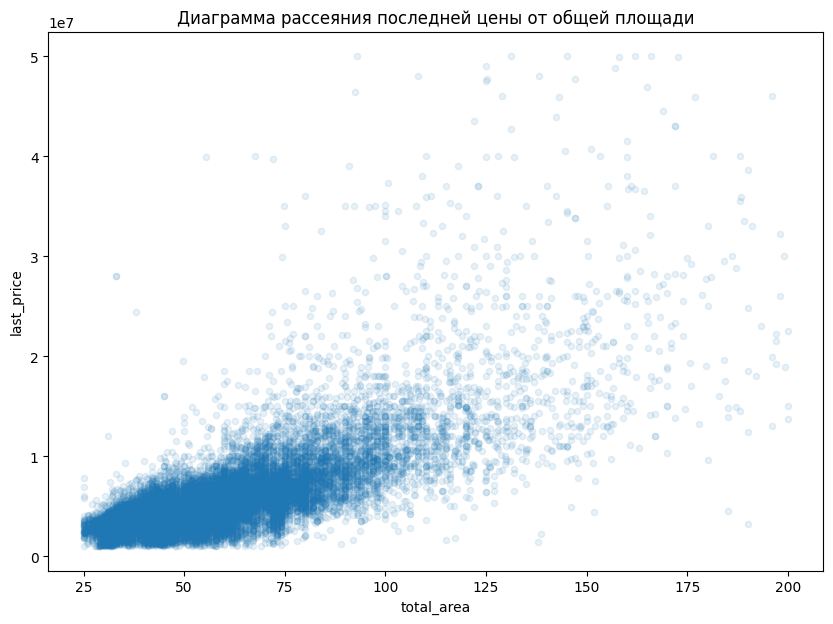

Корреляция = 0.75


In [100]:
#построим диаграмму рассеяния для last_price от total_area
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от общей площади')
plt.show()
#найдем корреляцию между total_area и last_price
print('Корреляция =', round(data['total_area'].corr(data['last_price']), 2))

Цена и общая площадь: до 120 квадратных метров и 12.5 млн лет данные тесно связаны, затем зависимость перестаёт быть устойчивой. 
Между ценой и общей площадью зависимость досточно сильная (корреляция = 0.75). 

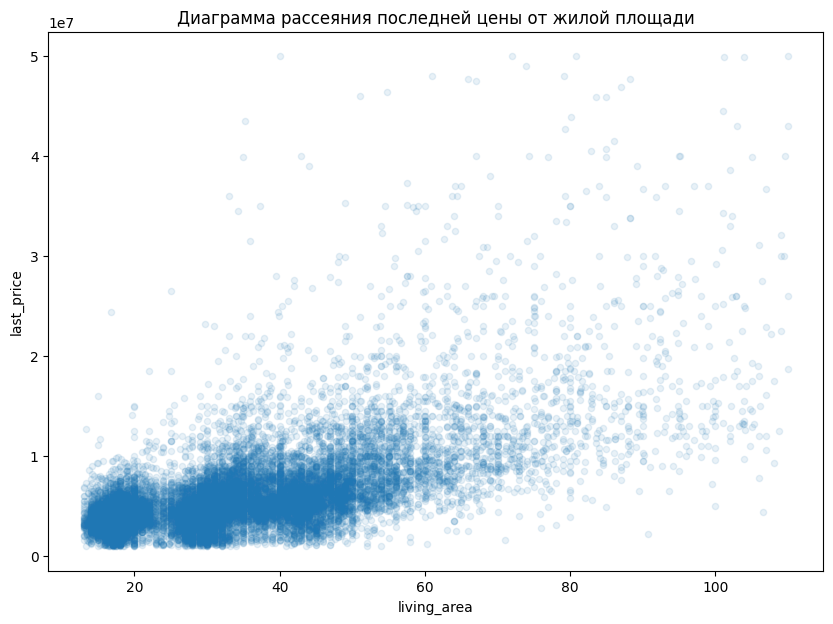

Корреляция = 0.65


In [101]:
#построим диаграмму рассеяния для last_price от living_area
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от жилой площади')
plt.show()
#найдем корреляцию между living_area и last_price
print('Корреляция =', round(data['living_area'].corr(data['last_price']), 2))

Цена и жилая площадь: до 60 квадратных метров и 10 млн данные тесно связаны, затем зависимость перестаёт быть устойчивой.  
Между ценой и жилой площадью зависимость менее сильная чем между ценой и общей площадью (корреляция = 0.65).

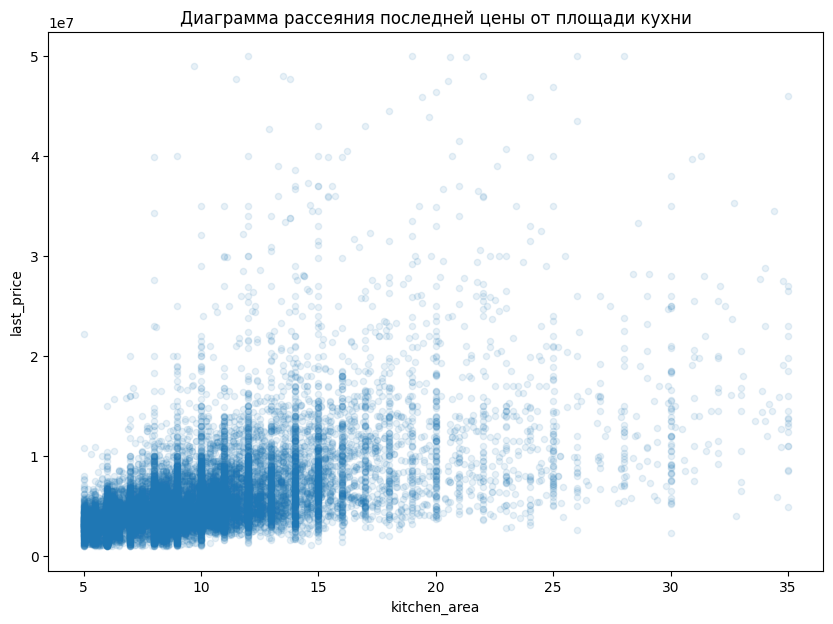

Корреляция = 0.56


In [102]:
#построим диаграмму рассеяния для last_price от kitchen_area
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от площади кухни')
plt.show()
#найдем корреляцию между kitchen_area и last_price
print('Корреляция =', round(data['kitchen_area'].corr(data['last_price']), 2))

Цена и площадь кухни: до 17 квадратных метров и 10 млн данные довольно тесно связаны, затем зависимость перестаёт быть устойчивой.  
Между ценой и площадью кухни зависимость наиболее слабая (корреляция = 0.56) для данных отражающих площади.

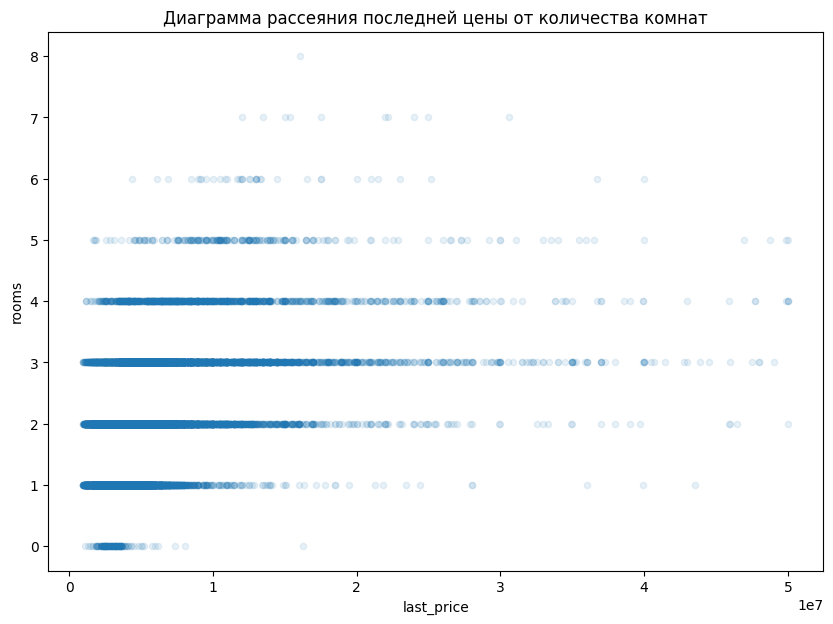

Корреляция = 0.45


,last_price
rooms,
0,3.192218e+06
1,3.888618e+06
2,5.512275e+06
3,7.577365e+06
4,1.062571e+07
5,1.332628e+07
6,1.449293e+07
7,1.971300e+07
8,1.610000e+07


In [103]:
#построим диаграмму рассеяния для last_price от rooms
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от количества комнат')
plt.show()
#найдем корреляцию между rooms и last_price
print('Корреляция =', round(data['rooms'].corr(data['last_price']), 2))
#найдем среднюю цену по количеству комнат
data.pivot_table(index='rooms', values='last_price').head(20)

Цена и количество комнат: есть слабая зависимость зависимость (корреляция = 0.45) между количеством комант и ценой, которая ослабевает для количества комнат больше 4.

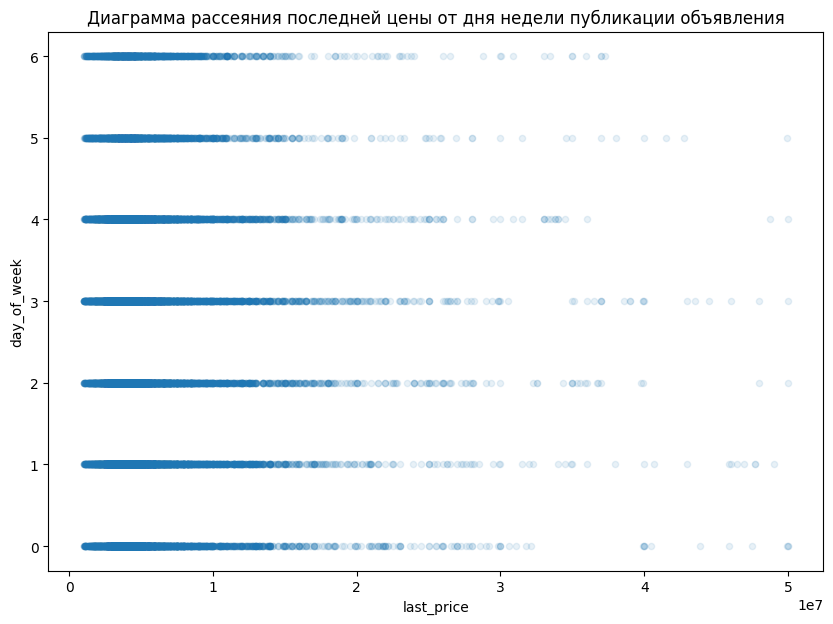

Корреляция = -0.02


,last_price
day_of_week,
0,5.866118e+06
1,5.841722e+06
2,5.906010e+06
3,5.911850e+06
4,5.666493e+06
5,5.669225e+06
6,5.659870e+06


In [104]:
#построим диаграмму рассеяния для last_price от day_of_week
data.plot(x='last_price', y='day_of_week', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от дня недели публикации объявления')
plt.show()
#найдем корреляцию между day_of_week и last_price
print('Корреляция =', round(data['last_price'].corr(data['day_of_week']), 2))
#найдем среднюю цену для каждого дня недели публикации объявления
data.pivot_table(index='day_of_week', values='last_price').head(20)

Гистограмма дня недели публикации свидетельствует, что зависимости между ценой и днем  недели публикации нету, что подверждает таблица со значениями средних цен для каждого дня недели публикации объявления.

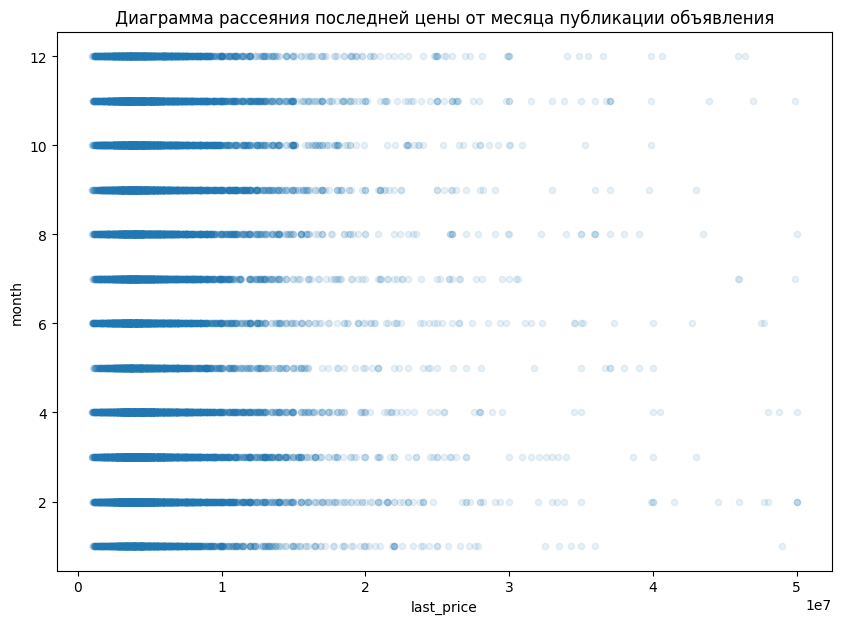

Корреляция = 0.01


,last_price
month,
1,5.819907e+06
2,5.859290e+06
3,5.698764e+06
4,5.823161e+06
5,5.813584e+06
6,5.701987e+06
7,5.756977e+06
8,5.855061e+06
9,5.908828e+06


In [105]:
#построим диаграмму рассеяния для last_price от month
data.plot(x='last_price', y='month', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от месяца публикации объявления')
plt.show()
#найдем корреляцию между month и last_price
print('Корреляция =', round(data['month'].corr(data['last_price']), 2))
#найдем среднюю цену для каждого месяца публикации объявления
data.pivot_table(index='month', values='last_price').head(20)

Гистограмма месяца публикации свидетельствует, что зависимости между ценой и месяцом публикации нету, что подверждает таблица со значениями средних цен для каждого месяца публикации объявления.

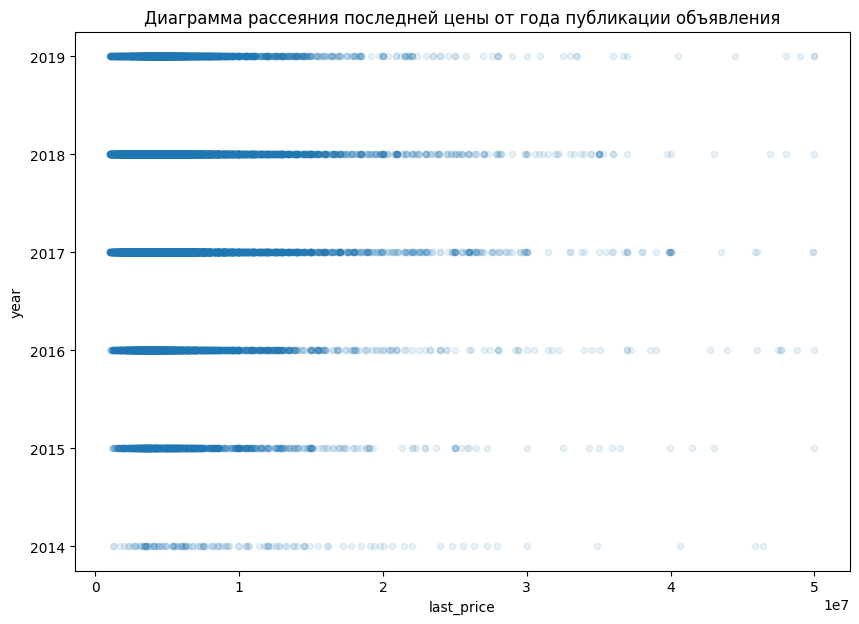

Корреляция = -0.03


,last_price
year,
2014,1.038028e+07
2015,6.561514e+06
2016,5.906595e+06
2017,5.679134e+06
2018,5.629772e+06
2019,6.128612e+06


In [106]:
#построим диаграмму рассеяния для last_price от year
data.plot(x='last_price', y='year', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от года публикации объявления')
plt.show()
#найдем корреляцию между year и last_price
print('Корреляция =', round(data['year'].corr(data['last_price']), 2))
#найдем среднюю цену для каждого года публикации объявления
data.pivot_table(index='year', values='last_price').head(20)

Гистограмма года публикации свидетельствует, цена квартир не сильно менялась от года к году, за исключение 2014 года, где цена была существенно выше. Также по гистограмме видно, что в 2014 году было меньше всего размещений объявлений (скорее всего из-за того, что платформа только появилась и еще не пользовалась большой популярностью).

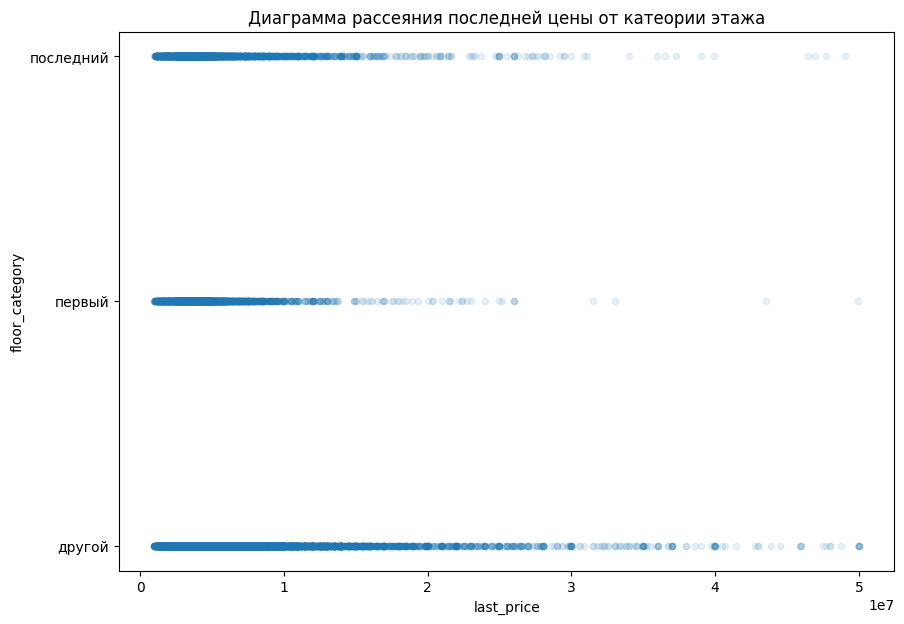

,last_price
floor_category,
другой,6.046965e+06
первый,4.656547e+06
последний,5.571437e+06


In [107]:
#построим диаграмму рассеяния для last_price от floor_category
data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от катеории этажа')
plt.show()
#найдем среднюю цену для каждого категории этажа квартиры
data.pivot_table(index='floor_category', values='last_price').head(20)

Гистограмма категории этажа свидетельствует, что цена квартир, расположенных на "другом" этаже самая большая. Самые дешевые квартиры - на 1 этаже.  
Это также подверждают данные по средней цене квартир, сгруппированные по типу этажа.  
Средняя цена квартиры на первом этаже - 4.66 млн, на последнем этаже - 5.57 млн, на "другом" этаже - 6.05 млн.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [108]:
#группируем столбцы по населенному пункту, добавляя столбцы со средней ценой одного квадратного метра и числом объявлений
data_ten = data.pivot_table(index='locality_name', values='price_square_m', aggfunc=['count', 'mean'])
#переименовываем названия столбцов
data_ten.columns = ['count', 'mean']
#сортируем данные по количеству объявлений и добавляем только 10 населённых пунктов с наибольшим числом объявлений
data_ten = data_ten.sort_values(by='count', ascending=False).head(10)

In [109]:
data_ten

,count,mean
locality_name,,
Санкт-Петербург,14844,111426.322319
поселок Мурино,505,84547.494178
поселок Шушары,422,77823.567678
Всеволожск,385,68579.801013
Пушкин,351,102834.861140
Колпино,333,75334.930480
поселок Парголово,313,90100.892173
Гатчина,296,68847.979426
деревня Кудрово,280,92238.901357


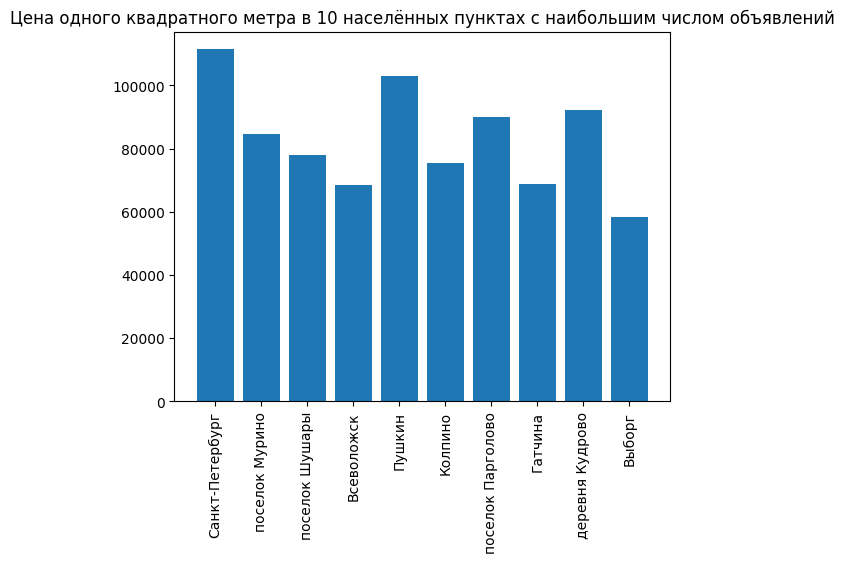

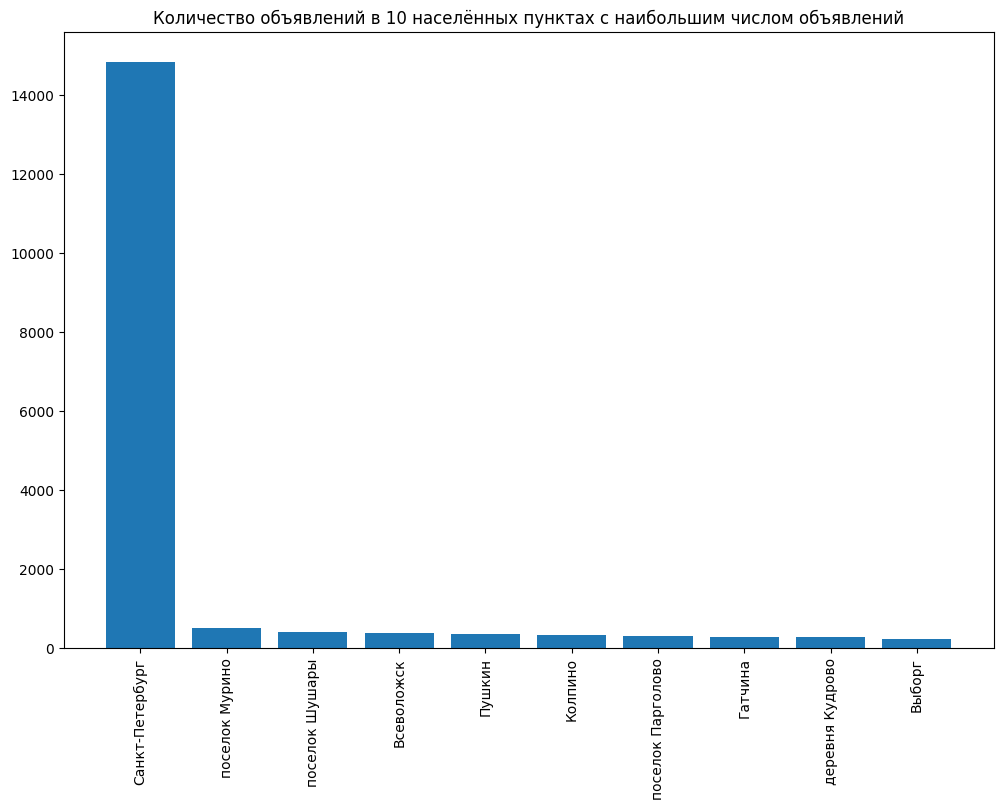

In [110]:
#построим столбчатую диаграмму для цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
plt.bar(data_ten.index, data_ten['mean'])
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=90)
plt.title('Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
plt.show()
#построим столбчатую диаграмму для количества объявлений в 10 населённых пунктах с наибольшим числом объявлений
plt.bar(data_ten.index, data_ten['count'])
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=90)
plt.title('Количество объявлений в 10 населённых пунктах с наибольшим числом объявлений')
plt.show()

In [111]:
print(data_ten['mean'].idxmax(), round(data_ten['mean'].max(),2))
print(data_ten['mean'].idxmin(), round(data_ten['mean'].min(),2))

Санкт-Петербург 111426.32
Выборг 58254.71


В таблице выдено количество объявлений и средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Ожидаемо Санкт-Петербург лидирует в населённых пунктах с наибольшим числом объявлений (14844 объявлений).  
Из 10 населённых пунктах с наибольшим числом объявлений самая высокая средняя цена одного квадратного метра принадлежит Санкт-Петербургу (111426.32), самая низкая в Выборге (58254.71).

#### Средняя цена каждого километра для квартир в Санкт-Петербурге 

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [112]:
#создаем новую таблицу, куда добавляем значения last_price и cityCenters_nearest
#только для квартир, находящихся в Санкт-Петербурге
#исключаем слишком близкие к центру квартиры и пропущенные значения

data_peters = data.loc[(data['locality_name'] == 'Санкт-Петербург') &
                        (data['cityCenters_nearest'] != 0) &
                       ~(data['cityCenters_nearest'].isna()),
                       ['last_price', 'cityCenters_nearest']]

#добавляем новый столбец price_km - среднюю цену каждого километра
data_peters['price_km'] = data_peters['last_price'] / data_peters['cityCenters_nearest']

In [113]:
#вычисляем среднюю цену каждого километра в Санкт-Петербурге
print(round(data_peters['price_km'].mean(), 2))

994980.58


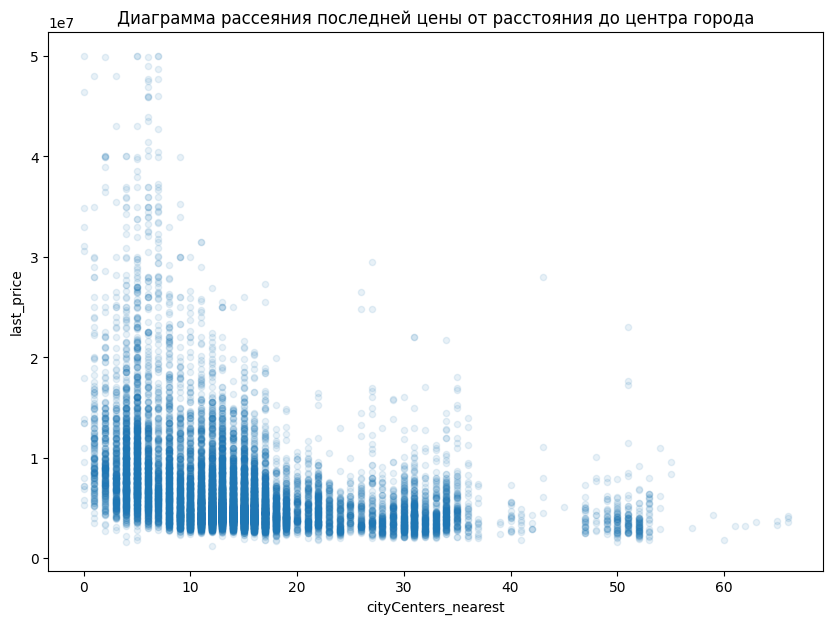

Корреляция = -0.33


In [114]:
#построим диаграмму рассеяния для last_price от cityCenters_nearest
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1, figsize=(10,7))
plt.title('Диаграмма рассеяния последней цены от расстояния до центра города')
plt.show()
#найдем корреляцию между cityCenters_nearest и last_price
print('Корреляция =', round(data['last_price'].corr(data['cityCenters_nearest']), 2))

Цена и расстояние до близжайщего центра в км: до 35 км и 10 млн есть зависимость между данными, затем зависимость перестаёт быть устойчивой. Между ценой расстоянием до близжайщего центра в км зависимость не очень сильная (корреляция = -0.33).
Средняя стоимость одного км равна 994980.58.

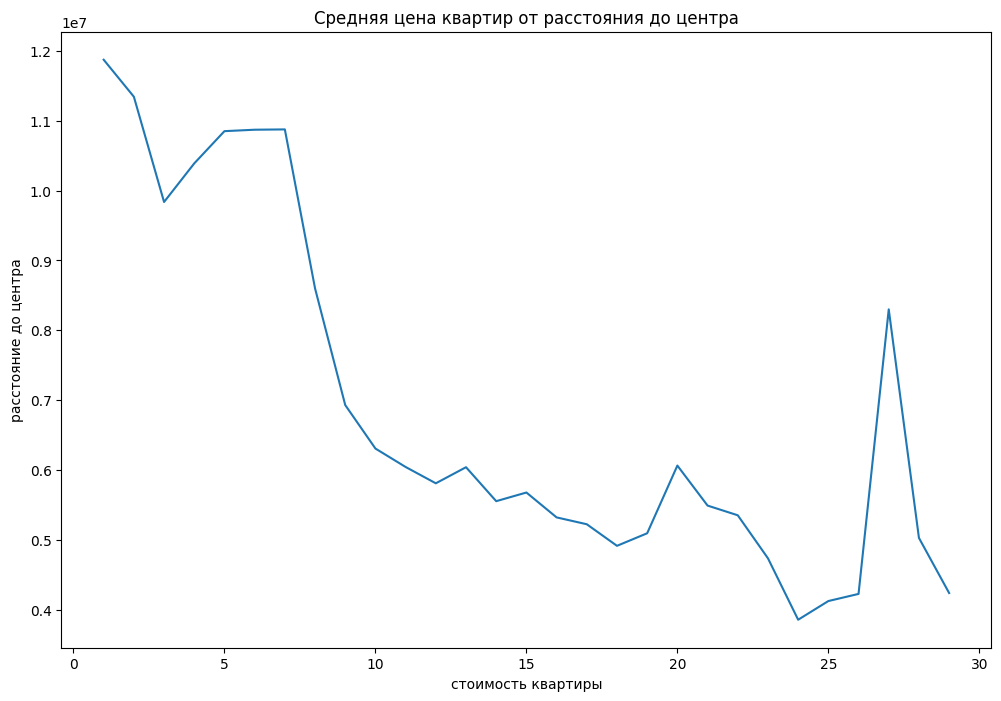

In [115]:
plt.plot(data_peters.groupby('cityCenters_nearest').agg({'last_price': 'mean'}))
plt.title('Средняя цена квартир от расстояния до центра')
plt.xlabel('стоимость квартиры')
plt.ylabel('расстояние до центра')
plt.show()

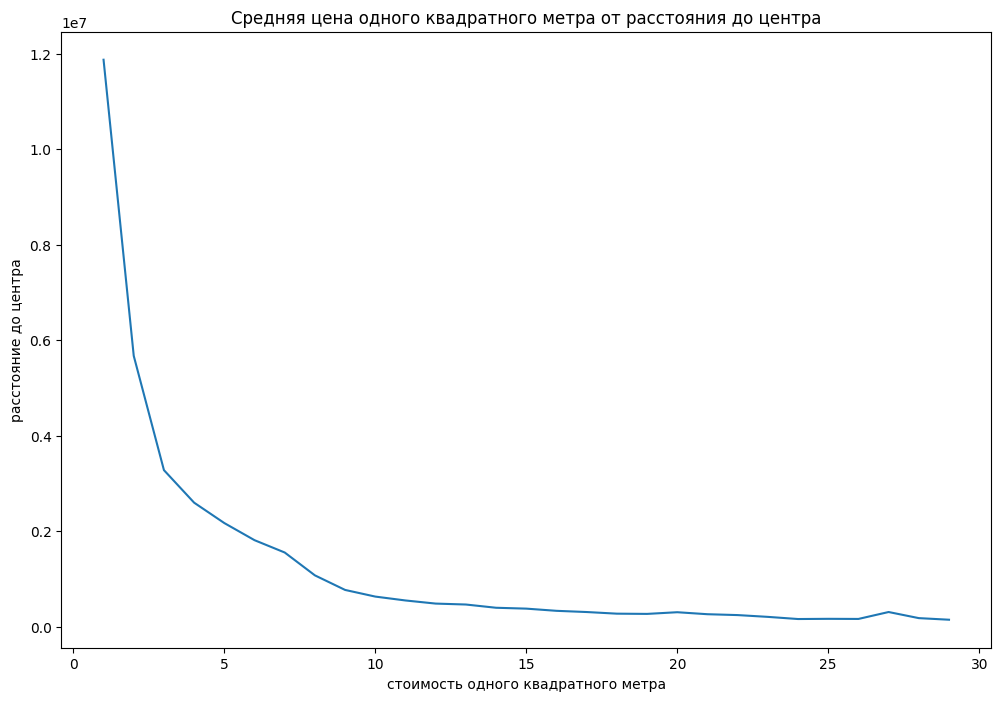

In [116]:
plt.plot(data_peters.groupby('cityCenters_nearest').agg({'price_km': 'mean'}))
plt.title('Средняя цена одного квадратного метра от расстояния до центра')
plt.xlabel('стоимость одного квадратного метра')
plt.ylabel('расстояние до центра')
plt.show()

Как видно из графиков средней полной цены и средней цены одного квадратного метра по мере удаления от центра цена снижается. График средней цены одного квадратного метра более гладкий, из-за того что на графике полной цены сильное влияние имеют удаленные от центра квартиры с большой площадью.

**Вывод: Из-за природы изучаемых данных а также из-за того что в ходе предобработки данных были удалены аномальные значения, кривые распредления данных имеют более короткие левые хвосты. В ходе работы было определено насколько сильная зависимость есть между ценой квартиры и ее площадью. Наиболее сильная зависимость была выявлена между ценой и общей площадью квартиры (корреляция 0.75), зависимости между ценой и жилой площадью, площадью кухни слабее (корреляция 0.65 и 0.56 соответсвенно). Было выяснено что на цену не влияет время размещения объявления.**

### Общий вывод

Изучив данные можно сделать вывод, что средняя продаваемая квартира это квартира со следующими параметрами: 
общая площадь = 57.74
жилая площадь = 33.00
площадь кухни = 10.08
количество комнат - 2
высота потолков = 2.71
этаж квартиры - 5.91
тип этажа - "другой"
общее количество этажей дома = 10.79
расстояние до близжайщего центра = 14.38 км
расстояние до близжайщего аэропрта = 28.86 км
расстояние до близжайщего парка = 493.69 м

В среднем квартира продается за 179.37 дней.

Было выявлено что количество опубликованных объявления снижается по выходным дням и в январе, мае. Больше всего объявлений публикуется в феврале, марте, апреле и ноябре. Цена не зависит от дня недели, месяца и года публикации объявления.

Самая сильная зависимость цены наблюдается от общей площади. Также на цену влияет тип этажа. Самые дорогие квартиры располагаются на "другом" этаже (средняяя стоимость квартиры на другом этаже 6.05 млн, на первом - 4.66 млн, на последнем - 5.57 млн.)

В ходе исследования было выяснено, что наибольшее количество объявлений в Санкт-Петербурге (14844 объявлений), со средней ценой квадратного метра жилья 111426.32. 

Было обнаружено, что на цену квартиры влияет удаленности о центра, средняя цена киллометра для квартир в Санкт-Петербурге равна 994980.58.

Пока в ходе исследования были потверждены некоторые очевидные закономерности: чем больше площадь квартиры тем больше ее цена. В дальнейшем можно продолжить исследования и найти закономерности между ценой и другими параметрами, представленными в датасете (количество балконов, количество парков и др.).  

В работе был посчитан один из важнейших параметров жилья - цена одного квадратного метра. Анализируя зависимость цены одного квадратного метра от других параметров можно будет найти неочевидные закономерности.